<a href="https://colab.research.google.com/github/saikiranmuthuluri/Resume/blob/main/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demand Forecasting and Product Planning**


Data Loading & Exploaratory Analysis




In [ ]:
#Importing Necessary Lib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib. pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sales_dataset.csv')

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sales_dataset.csv')

# Get distinct products under each category
distinct_products_by_category = df.groupby('Category')['Product_Name'].unique()

# Print distinct products under each category
for category, products in distinct_products_by_category.items():
    print(f"Category: {category}")
    print("Distinct Products:", products)
    print()


Category: Camera
Distinct Products: ['Canon EOS Rebel DSLR Camera' 'Sony Alpha Mirrorless Camera'
 'Nikon DSLR Camera']

Category: Headphones
Distinct Products: ['Sony WH-1000XM4 Wireless Headphones' 'JBL Quantum Gaming Headset'
 'boAt Rockerz']

Category: Laptop
Distinct Products: ['Dell XPS' 'Lenovo IdeaPad' 'HP Spectre x360']

Category: Smartphone
Distinct Products: ['iPhone 12' 'Samsung Galaxy S21' 'OnePlus 9 Pro']

Category: Tv
Distinct Products: ['LG OLED TV' 'Sony BRAVIA OLED TV' 'Samsung QLED TV']



In [ ]:
data.shape

(4444, 18)

In [ ]:
data.isnull().sum()

Product_ID               0
Product_Name             0
Category                 0
Units_Sold               0
Revenue                  0
Order_Date               0
Delivery_Date            0
Inventory_Level          0
Customer_ID              0
Season                   0
Holiday                  0
Location                 0
Lead_Time                0
Supplier_Performance     0
Social_Media_Mentions    0
External_Events          0
Quality_Control          0
Price                    0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_ID             4444 non-null   object 
 1   Product_Name           4444 non-null   object 
 2   Category               4444 non-null   object 
 3   Units_Sold             4444 non-null   int64  
 4   Revenue                4444 non-null   int64  
 5   Order_Date             4444 non-null   object 
 6   Delivery_Date          4444 non-null   object 
 7   Inventory_Level        4444 non-null   int64  
 8   Customer_ID            4444 non-null   object 
 9   Season                 4444 non-null   object 
 10  Holiday                4444 non-null   int64  
 11  Location               4444 non-null   object 
 12  Lead_Time              4444 non-null   int64  
 13  Supplier_Performance   4444 non-null   float64
 14  Social_Media_Mentions  4444 non-null   int64  
 15  Exte

In [ ]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

In [ ]:
data.columns

Index(['Product_ID', 'Product_Name', 'Category', 'Units_Sold', 'Revenue',
       'Order_Date', 'Delivery_Date', 'Inventory_Level', 'Customer_ID',
       'Season', 'Holiday', 'Location', 'Lead_Time', 'Supplier_Performance',
       'Social_Media_Mentions', 'External_Events', 'Quality_Control', 'Price'],
      dtype='object')

In [ ]:
data.head()

,Product_ID,Product_Name,Category,Units_Sold,Revenue,Order_Date,Delivery_Date,Inventory_Level,Customer_ID,Season,Holiday,Location,Lead_Time,Supplier_Performance,Social_Media_Mentions,External_Events,Quality_Control,Price
0,TV001,LG OLED TV,Tv,12,17988,2018-01-01,2018-01-05,180,Cust_882,January,1,Ahmedabad,4,0.948296,57,1,Fail,1499
1,SP002,iPhone 12,Smartphone,12,11988,2018-01-02,2018-01-05,95,Cust_247,January,0,Delhi,3,0.946373,41,0,Fail,999
2,LT002,Dell XPS,Laptop,17,22083,2018-01-02,2018-01-05,120,Cust_448,January,1,Bangalore,3,0.847091,63,0,Pass,1299
3,TV003,Sony BRAVIA OLED TV,Tv,14,25186,2018-01-02,2018-01-05,191,Cust_319,January,1,Kolkata,3,0.897118,86,1,Fail,1799
4,CAM001,Canon EOS Rebel DSLR Camera,Camera,17,13583,2018-01-02,2018-01-06,55,Cust_641,January,1,Ahmedabad,4,0.956918,63,1,Fail,799


In [ ]:
distinct_product_names = data['Location'].unique()

# Print the result
print("Distinct Product Names:")
print(distinct_product_names)


Distinct Product Names:
['Ahmedabad' 'Delhi' 'Bangalore' 'Kolkata' 'Mumbai' 'Pune' 'Hyderabad'
 'Chennai']


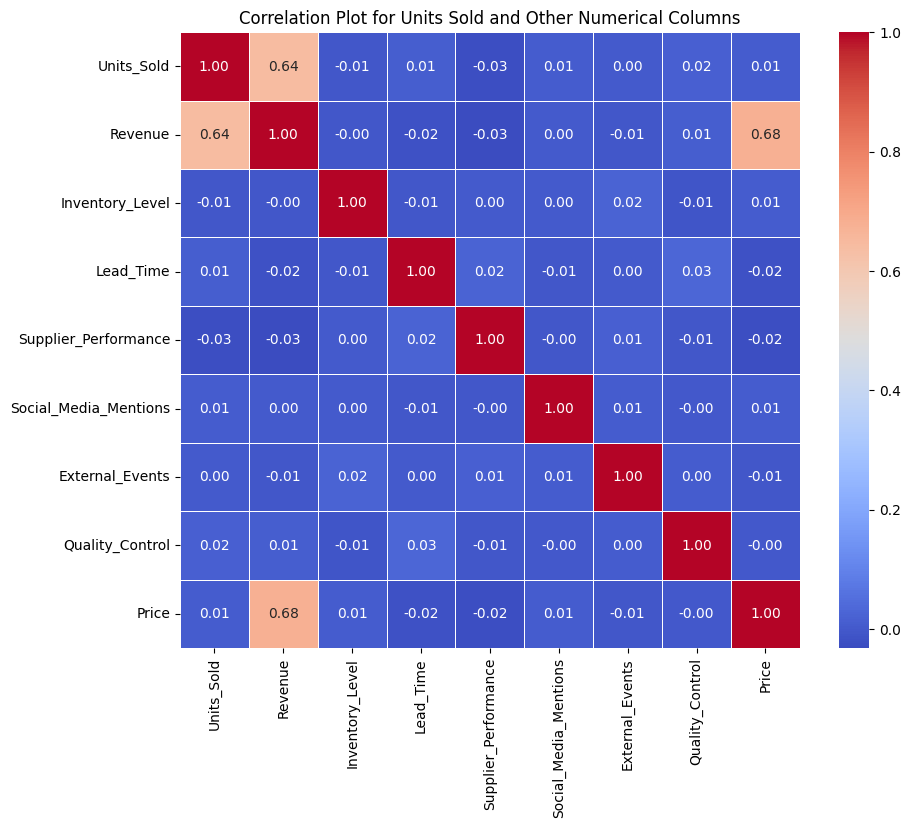

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sales_dataset.csv')

# Encoding 'Quality_Control' column
df['Quality_Control'] = df['Quality_Control'].map({'Fail': 0, 'Pass': 1})

# Selecting numerical columns again
numerical_columns = ['Units_Sold', 'Revenue', 'Inventory_Level', 'Lead_Time', 'Supplier_Performance',
                     'Social_Media_Mentions', 'External_Events', 'Quality_Control', 'Price']

# Filtering out non-numeric columns
numeric_df = df[numerical_columns]

# Creating a correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot for Units Sold and Other Numerical Columns')
plt.show()



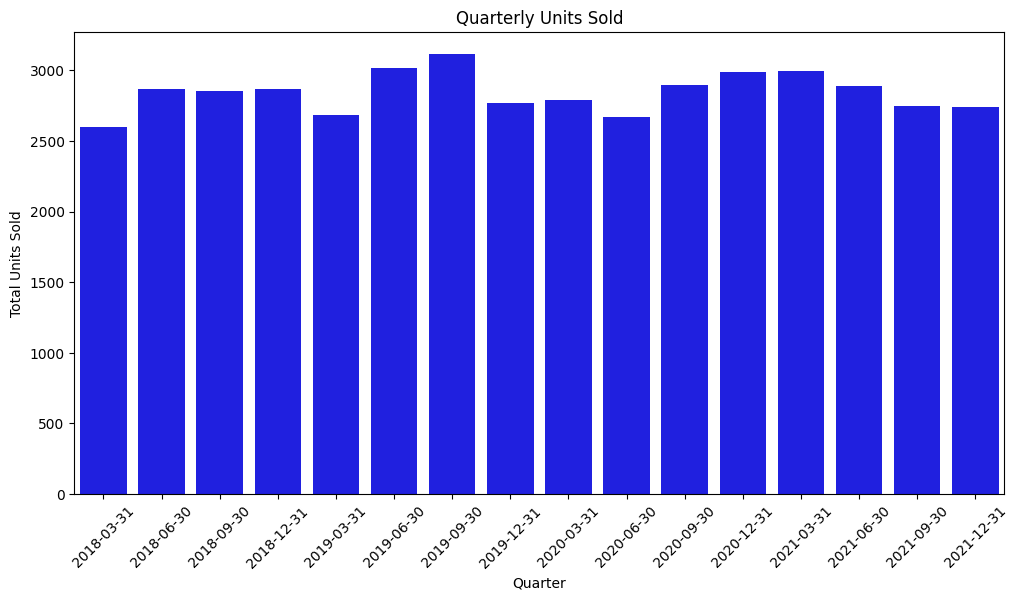

In [ ]:
#Grouping Data into Quarters
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
quarterly_data = data.resample('Q', on='Order_Date').sum()
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_data, x=quarterly_data.index, y='Units_Sold', color='blue')
plt.title('Quarterly Units Sold')
plt.xlabel('Quarter')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

⏫Q3 of 2019 are Having The **Highest Units sold**

Month with the Highest Revenue: December 2020
Highest Revenue: $1120236.00


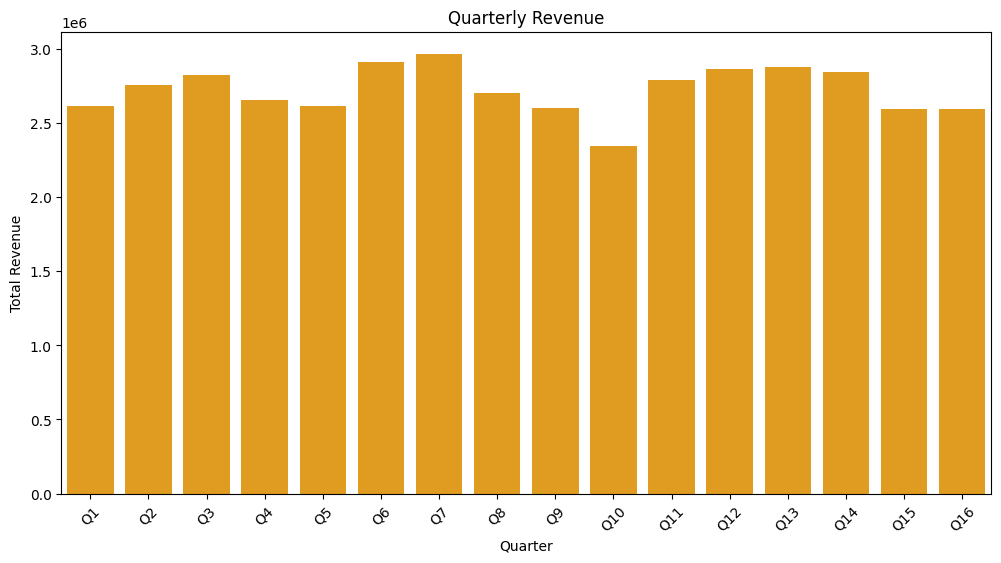

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is your DataFrame

# Convert 'Order_Date' to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Group by month and sum the revenue
monthly_revenue = data.resample('M', on='Order_Date')['Revenue'].sum()

# Find the month with the highest revenue
highest_revenue_month = monthly_revenue.idxmax().strftime('%B %Y')
highest_revenue_value = monthly_revenue.max()
print(f"Month with the Highest Revenue: {highest_revenue_month}")
print(f"Highest Revenue: ${highest_revenue_value:.2f}")

# Group by quarter and sum the revenue
quarterly_revenue = data.resample('Q', on='Order_Date')['Revenue'].sum()
quarter_labels = [f'Q{q}' for q in range(1, len(quarterly_revenue) + 1)]

# Plot the quarterly revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=quarter_labels, y=quarterly_revenue.values, color='orange')
plt.title('Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



**⏫Q3 of 2019** Having The **Highest Revenue**

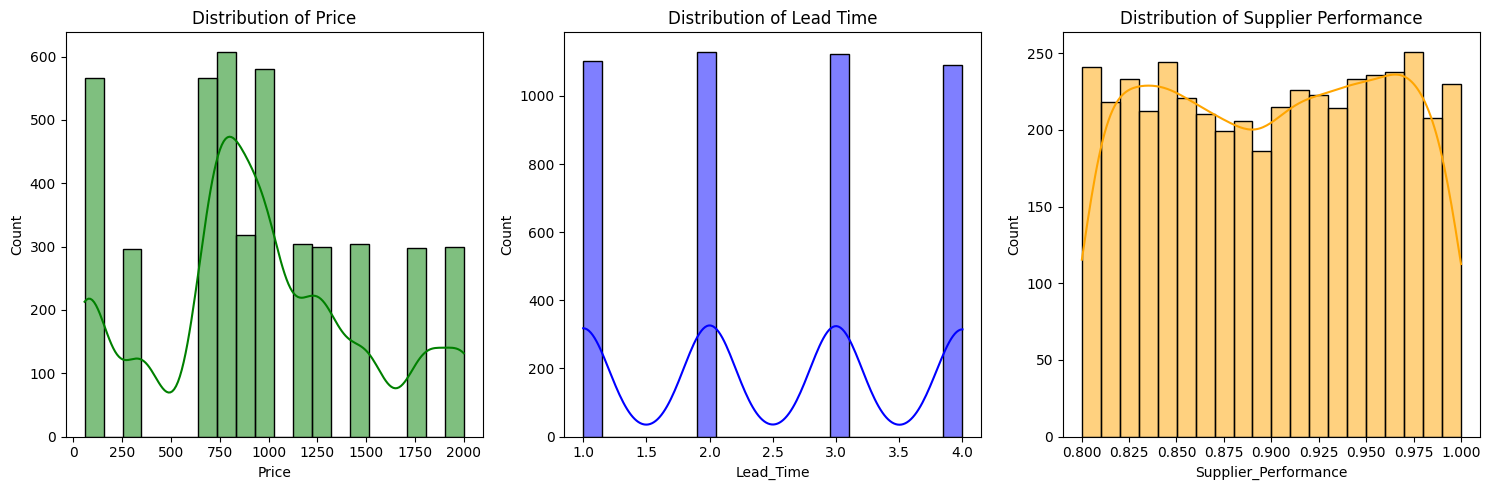

In [ ]:
# Plotting histograms for price, lead time, and supplier performance
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Price'], bins=20, kde=True, color='green')
plt.title('Distribution of Price')

plt.subplot(1, 3, 2)
sns.histplot(data['Lead_Time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Lead Time')

plt.subplot(1, 3, 3)
sns.histplot(data['Supplier_Performance'], bins=20, kde=True, color='orange')
plt.title('Distribution of Supplier Performance')

plt.tight_layout()
plt.show()


⏫Everything are Equally Distributed

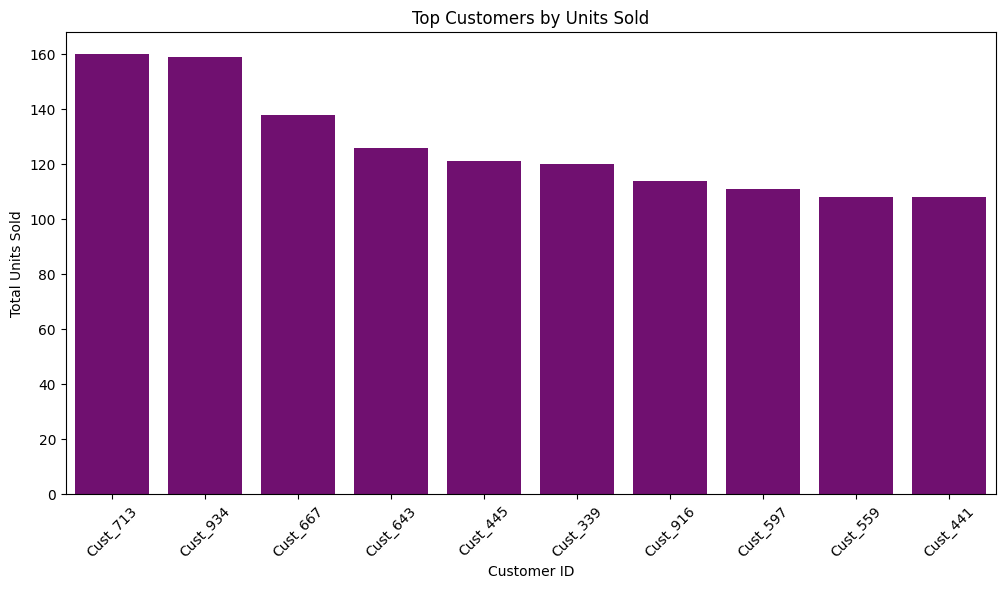

In [ ]:
# Plotting a bar chart for top customers
top_customers = data.groupby('Customer_ID')['Units_Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, color='purple')
plt.title('Top Customers by Units Sold')
plt.xlabel('Customer ID')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


⏫Customer_713 Purchased More Units Compared to Others Followed By Customer_934 & Customer_667

In [ ]:
#categories mostly bought by customer_713
customer_713_data = data[data['Customer_ID'] == 'Cust_713']
if not customer_713_data.empty:
    top_categories = customer_713_data['Category'].value_counts()
    print(f"Categories mostly bought by Customer_713:\n{top_categories}")
    total_revenue = customer_713_data['Revenue'].sum()
    print(f"\nTotal Revenue generated by Customer_713: ${total_revenue:.2f}")
else:
    print("No data found for Customer_713.")

Categories mostly bought by Customer_713:
Category
Smartphone    4
Tv            2
Laptop        2
Headphones    2
Camera        1
Name: count, dtype: int64

Total Revenue generated by Customer_713: $135770.00


⏫These are items that Customer_200 Purchased Mostly

In [ ]:
#Mostly sold units
most_sold_category_units = data.groupby('Category')['Units_Sold'].sum().idxmax()
most_sold_product_units = data.groupby('Product_Name')['Units_Sold'].sum().idxmax()
print(f"Most Sold Category by Units Sold: {most_sold_category_units}")
print(f"Most Sold Product by Units Sold: {most_sold_product_units}")

Most Sold Category by Units Sold: Tv
Most Sold Product by Units Sold: OnePlus 9 Pro


Category
Camera        8876
Headphones    8970
Laptop        9298
Smartphone    9023
Tv            9328
Name: Units_Sold, dtype: int64


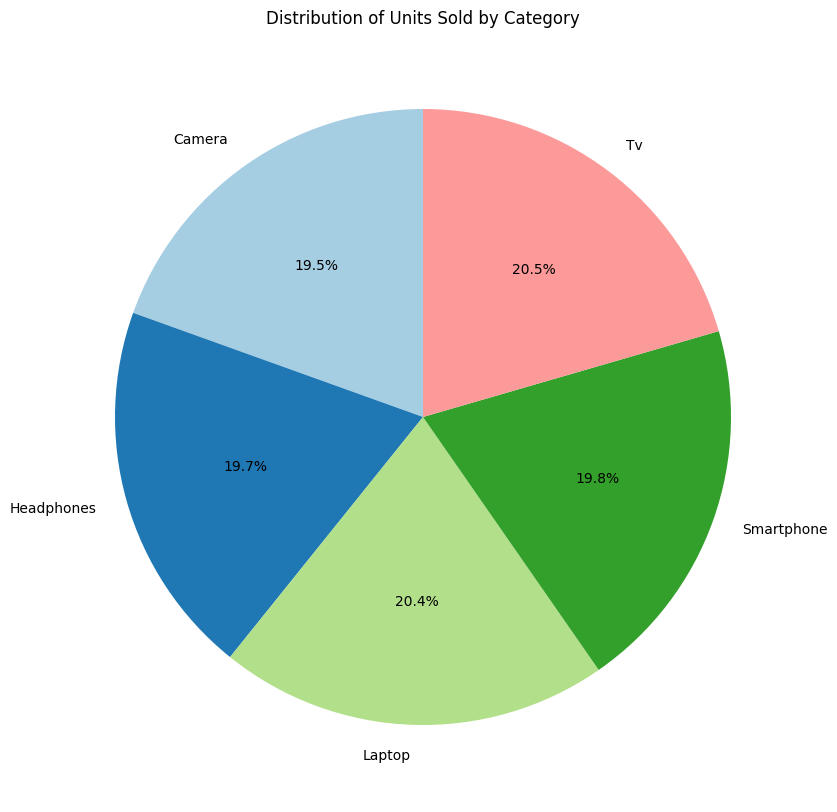

In [ ]:
#categories sold by units
most_sold_category_units = data.groupby('Category')['Units_Sold'].sum()
print(most_sold_category_units)
plt.figure(figsize=(10, 10))
plt.pie(most_sold_category_units, labels=most_sold_category_units.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Units Sold by Category')
plt.show()


In [ ]:
#Segementing customers using RFM(RECENCY, FREQUENCY, MONETRY)
data['Order_Date'] = pd.to_datetime(data['Order_Date'], dayfirst=True)
current_date = pd.to_datetime('01-11-2022', format='%d-%m-%Y')
recency_data = data.groupby('Customer_ID')['Order_Date'].max().reset_index(name='Last_Purchase_Date')
recency_data['Recency'] = (current_date - recency_data['Last_Purchase_Date']).dt.days
recency_data['Last_Purchase_Date'] = recency_data['Last_Purchase_Date'].dt.strftime('%d-%m-%Y')
frequency_data = data.groupby('Customer_ID')['Order_Date'].nunique().reset_index(name='Frequency')
monetary_data = data.groupby('Customer_ID')['Revenue'].sum().reset_index(name='Monetary')
rfm_data = pd.merge(recency_data[['Customer_ID', 'Last_Purchase_Date', 'Recency']],
                    frequency_data,
                    on='Customer_ID')
rfm_data = pd.merge(rfm_data, monetary_data, on='Customer_ID')
print(rfm_data)


    Customer_ID Last_Purchase_Date  Recency  Frequency  Monetary
0        Cust_1         03-12-2021      333          6     31093
1       Cust_10         09-12-2021      327          6     71649
2      Cust_100         02-06-2021      517          7     87253
3      Cust_101         27-10-2021      370          6     43846
4      Cust_102         11-09-2020      781          3     15256
..          ...                ...      ...        ...       ...
986    Cust_995         18-01-2020     1018          2     16767
987    Cust_996         25-07-2020      829          3     24171
988    Cust_997         16-07-2020      838          3     19040
989    Cust_998         15-11-2020      716          6     99728
990    Cust_999         15-08-2021      443          4     28459

[991 rows x 5 columns]


In [ ]:
rfm_data = data.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (current_date - x.max()).days,  # Recency
    'Product_ID': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
})
rfm_data.rename(columns={'Order_Date': 'Recency', 'Product_ID': 'Frequency', 'Revenue': 'Monetary'}, inplace=True)
recency_quartiles = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])
frequency_quartiles = pd.qcut(rfm_data['Frequency'], q=4, labels=[1, 2, 3, 4])
monetary_quartiles = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4])
rfm_data['Recency_Quartile'] = recency_quartiles
rfm_data['Frequency_Quartile'] = frequency_quartiles
rfm_data['Monetary_Quartile'] = monetary_quartiles
rfm_data['RFM_Segment'] = rfm_data['Recency_Quartile'].astype(str) + rfm_data['Frequency_Quartile'].astype(str) + rfm_data['Monetary_Quartile'].astype(str)
print(rfm_data.head())


             Recency  Frequency  Monetary Recency_Quartile Frequency_Quartile  \
Customer_ID                                                                     
Cust_1           333          5     31093                4                  3   
Cust_10          327          6     71649                4                  4   
Cust_100         517          5     87253                3                  3   
Cust_101         370          6     43846                4                  4   
Cust_102         781          3     15256                1                  1   

            Monetary_Quartile RFM_Segment  
Customer_ID                                
Cust_1                      2         432  
Cust_10                     4         444  
Cust_100                    4         334  
Cust_101                    3         443  
Cust_102                    1         111  


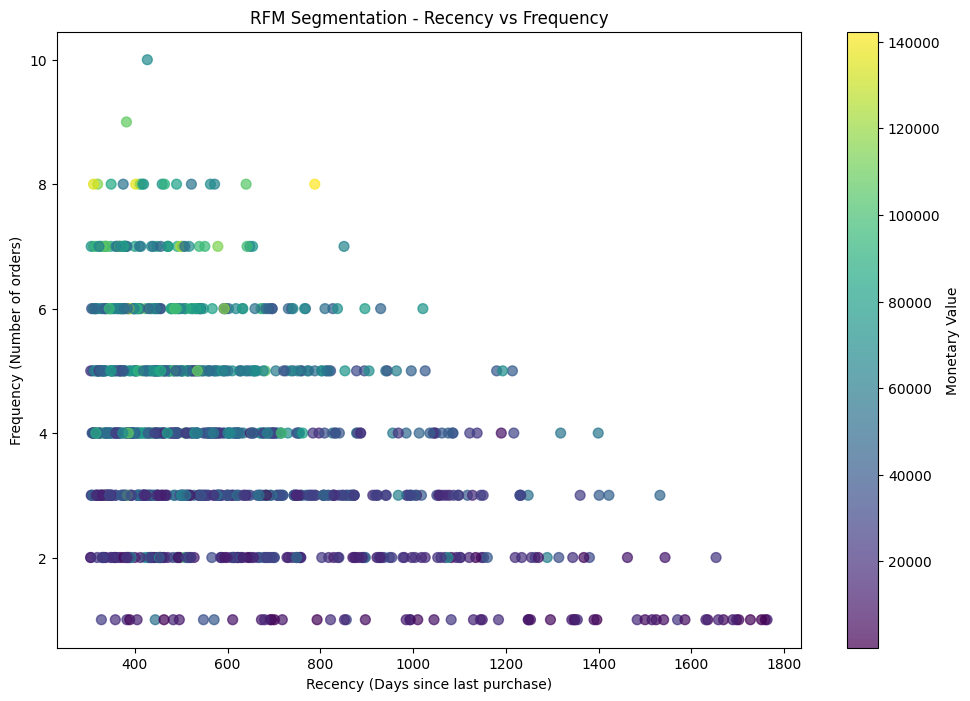

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], c=rfm_data['Monetary'], cmap='viridis', s=50, alpha=0.7)
plt.title('RFM Segmentation - Recency vs Frequency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of orders)')
cbar = plt.colorbar(scatter)
cbar.set_label('Monetary Value')
plt.show()

⏫Segmented The Customers Based On The their Recency, Frequency & Monetary

In [ ]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data_ts_units = data.set_index('Order_Date')
units_sold_monthly = data_ts_units.resample('M')['Units_Sold'].sum()
units_sold_monthly

Order_Date
2018-01-31     995
2018-02-28     688
2018-03-31     915
2018-04-30    1042
2018-05-31     867
2018-06-30     956
2018-07-31     944
2018-08-31     988
2018-09-30     920
2018-10-31    1045
2018-11-30     965
2018-12-31     859
2019-01-31     795
2019-02-28     869
2019-03-31    1023
2019-04-30     987
2019-05-31    1121
2019-06-30     911
2019-07-31    1102
2019-08-31    1013
2019-09-30    1000
2019-10-31     829
2019-11-30     933
2019-12-31    1008
2020-01-31     883
2020-02-29     992
2020-03-31     918
2020-04-30     831
2020-05-31     813
2020-06-30    1027
2020-07-31     957
2020-08-31     985
2020-09-30     955
2020-10-31     978
2020-11-30     886
2020-12-31    1124
2021-01-31     975
2021-02-28     978
2021-03-31    1042
2021-04-30     918
2021-05-31     948
2021-06-30    1022
2021-07-31     905
2021-08-31     969
2021-09-30     876
2021-10-31     997
2021-11-30     932
2021-12-31     809
Freq: M, Name: Units_Sold, dtype: int64

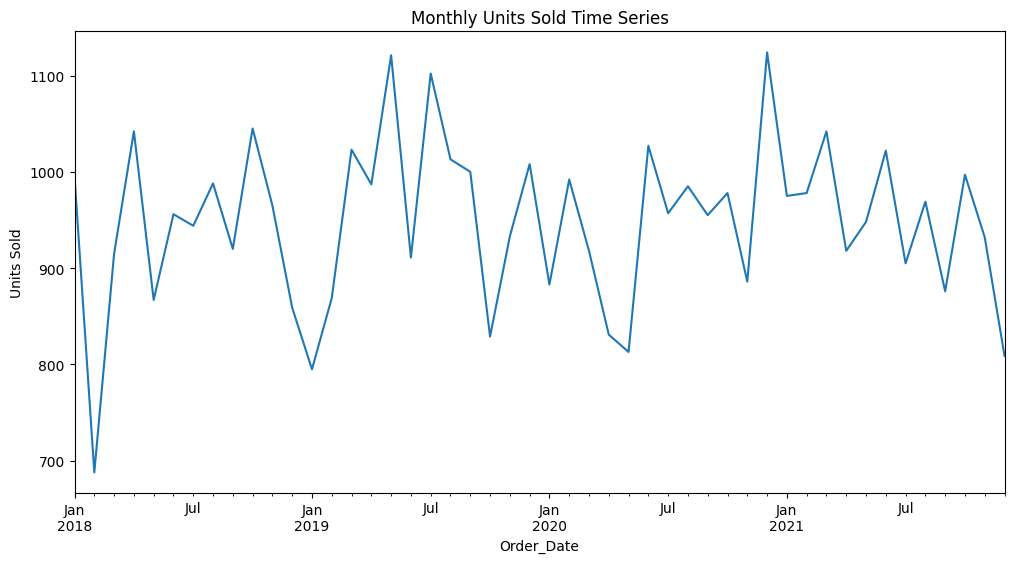

In [ ]:
plt.figure(figsize=(12, 6))
units_sold_monthly.plot(title='Monthly Units Sold Time Series')
plt.xlabel('Order_Date')
plt.ylabel('Units Sold')
plt.show()

In [ ]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data_ts_revenue = data.set_index('Order_Date')
revenue_monthly = data_ts_revenue.resample('M')['Revenue'].sum()
revenue_monthly

Order_Date
2018-01-31     996555
2018-02-28     736512
2018-03-31     877865
2018-04-30     974968
2018-05-31     854443
2018-06-30     923554
2018-07-31     950446
2018-08-31    1037992
2018-09-30     831000
2018-10-31     975285
2018-11-30     889785
2018-12-31     787541
2019-01-31     751195
2019-02-28     821881
2019-03-31    1037907
2019-04-30     958633
2019-05-31    1088899
2019-06-30     859049
2019-07-31    1021728
2019-08-31     996097
2019-09-30     948790
2019-10-31     745241
2019-11-30     980427
2019-12-31     977092
2020-01-31     778467
2020-02-29     927488
2020-03-31     892932
2020-04-30     687679
2020-05-31     761967
2020-06-30     896793
2020-07-31     985733
2020-08-31     943775
2020-09-30     859625
2020-10-31     949322
2020-11-30     795884
2020-12-31    1120236
2021-01-31     922205
2021-02-28     997512
2021-03-31     959358
2021-04-30     922182
2021-05-31     923192
2021-06-30     995178
2021-07-31     837335
2021-08-31     891211
2021-09-30     863784

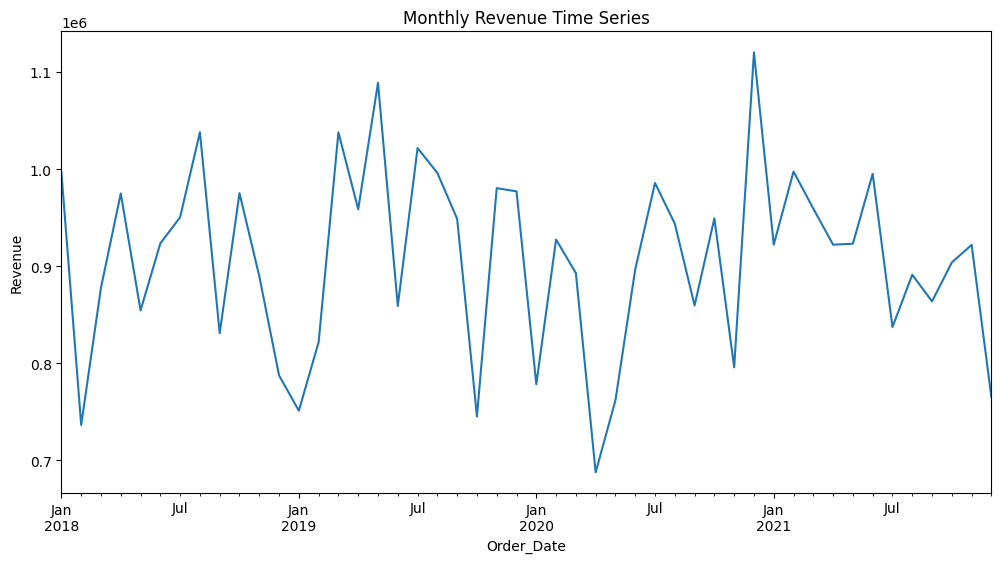

In [ ]:
# MONTHLY TIME SERIES OF REVENUE
plt.figure(figsize=(12, 6))
revenue_monthly.plot(title='Monthly Revenue Time Series')
plt.xlabel('Order_Date')
plt.ylabel('Revenue')
plt.show()

In [ ]:
#FINDING CORRELATION BETWEEN UNITS SOLD AND REVENUE
correlation = data['Units_Sold'].corr(data['Revenue'])
print(f'Correlation between Units Sold and Revenue: {correlation}')

Correlation between Units Sold and Revenue: 0.6444224367103862


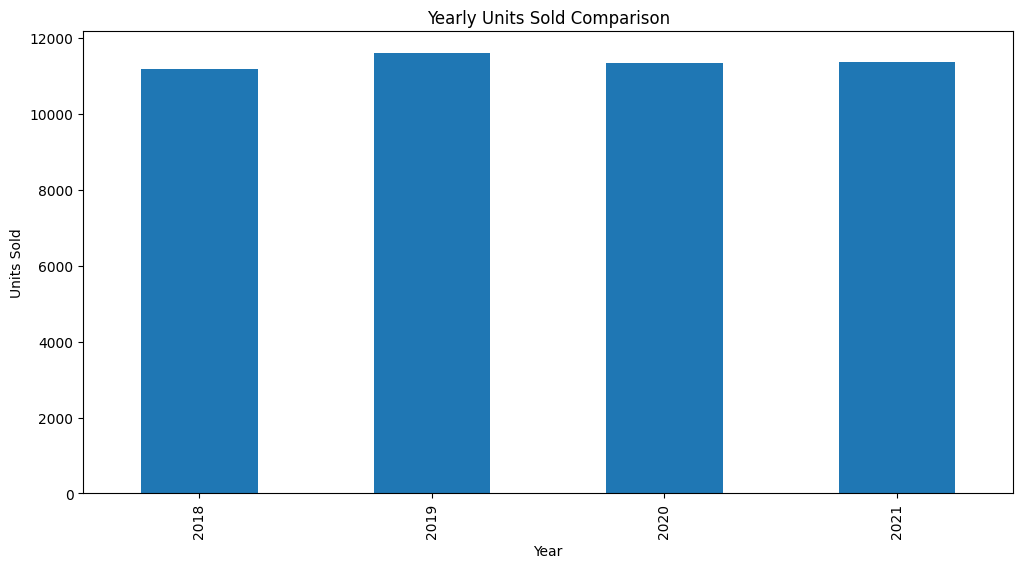

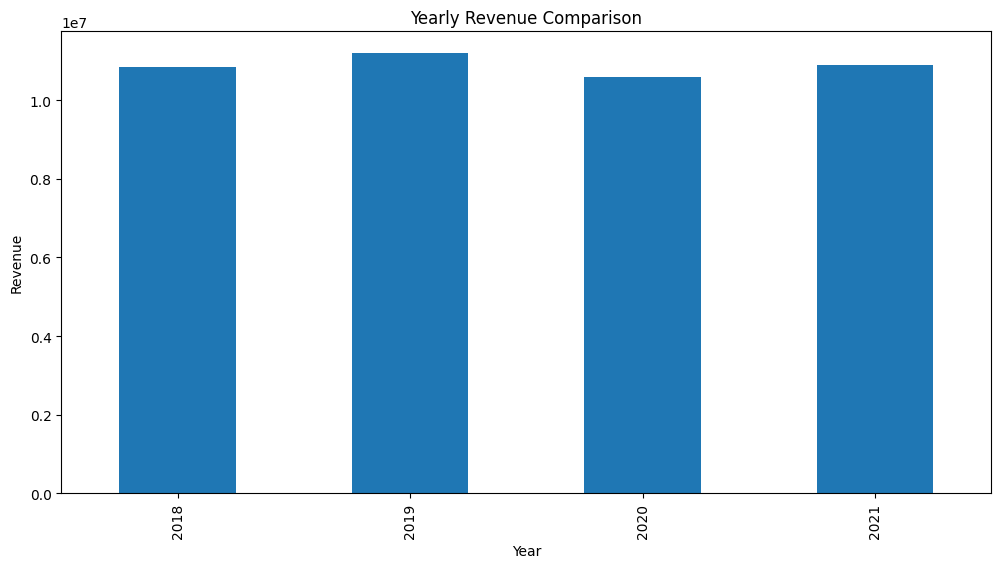

In [ ]:
#YEARLY COMPARISON
data_ts_units['Year'] = data_ts_units.index.year
data_ts_revenue['Year'] = data_ts_revenue.index.year
units_sold_yearly = data_ts_units.groupby('Year')['Units_Sold'].sum()
revenue_yearly = data_ts_revenue.groupby('Year')['Revenue'].sum()
plt.figure(figsize=(12, 6))
units_sold_yearly.plot(kind='bar', title='Yearly Units Sold Comparison')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()
plt.figure(figsize=(12, 6))
revenue_yearly.plot(kind='bar', title='Yearly Revenue Comparison')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()


⏫Year 2019 Having **Highest Units sold & Revenue**


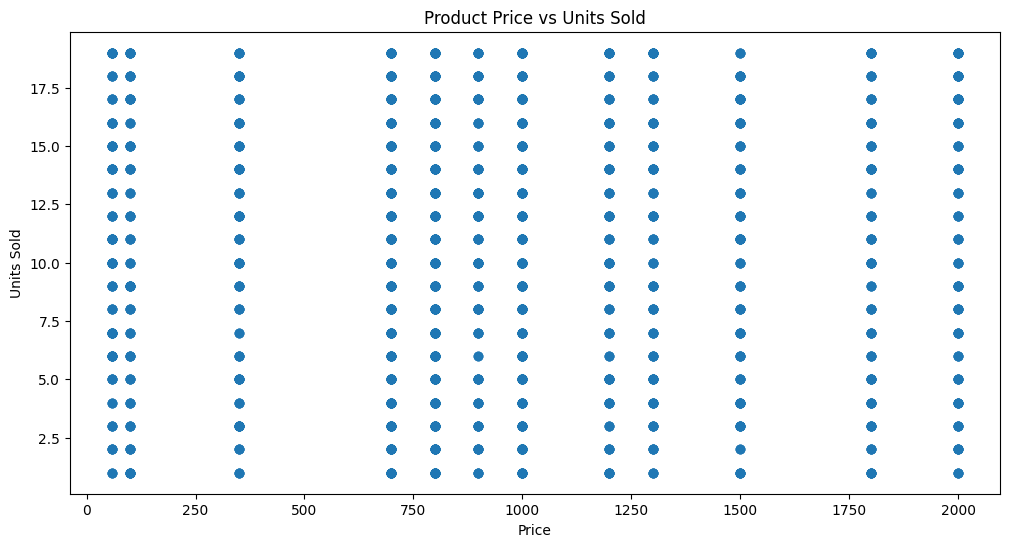

In [ ]:
# PRODUCTS SOLD VS UNITS SOLD
plt.figure(figsize=(12, 6))
plt.scatter(data['Price'], data['Units_Sold'], alpha=0.5)
plt.title('Product Price vs Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()


In [ ]:
total_external_events = data['External_Events'].sum()
print(f"Total External Events: {total_external_events}")

Total External Events: 2178


⏫External Events are Events that Occured Externally like Social Events,Wars, Economic DownTurns, Pandemics etc

In [ ]:
#CATEGORIES WITH HIGHEST SOLD DURING EXTERNAL EVENTS
external_events_data = data[data['External_Events'] > 0]
products_sold_during_events = external_events_data.groupby('Category')['Units_Sold'].sum()
category_highest_sold = products_sold_during_events.idxmax()
units_highest_sold = products_sold_during_events.max()
print(f"Category with the Highest Units Sold During External Events: {category_highest_sold}, Units Sold: {units_highest_sold}")


Category with the Highest Units Sold During External Events: Tv, Units Sold: 4761


In [ ]:
# Separating data into two sets: one with external events and one without
tv_data_with_external_events = data[(data['Category'] == 'Tv') & (data['External_Events'] > 0)]
tv_data_without_external_events = data[(data['Category'] == 'Tv') & (data['External_Events'] == 0)]
# Calculate total TV units sold with and without external events
total_tv_units_with_events = tv_data_with_external_events['Units_Sold'].sum()
total_tv_units_without_events = tv_data_without_external_events['Units_Sold'].sum()
print(f"Total TV Units Sold During External Events: {total_tv_units_with_events}")
print(f"Total TV Units Sold Without External Events: {total_tv_units_without_events}")


Total TV Units Sold During External Events: 4761
Total TV Units Sold Without External Events: 4567


⏫Tv's are Mostly sold during external events and it is even having more number of sales during external events compared to days of No external events

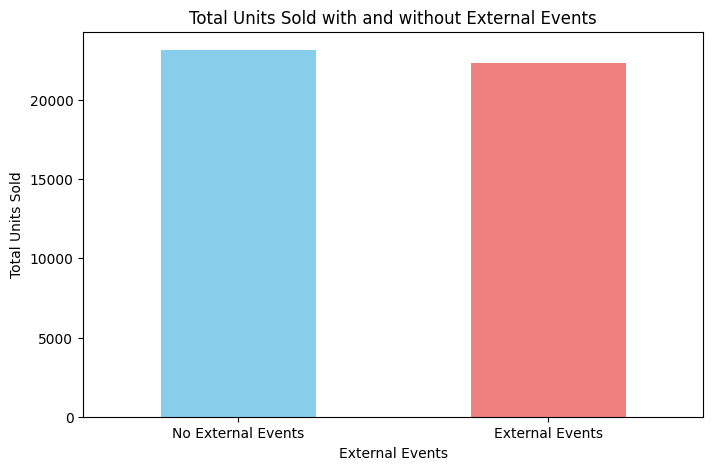

In [ ]:
# Group by External Events and sum units sold
units_sold_by_events = data.groupby('External_Events')['Units_Sold'].sum()
plt.figure(figsize=(8, 5))
units_sold_by_events.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Total Units Sold with and without External Events')
plt.xlabel('External Events')
plt.ylabel('Total Units Sold')
plt.xticks(ticks=[0, 1], labels=['No External Events', 'External Events'], rotation=0)
plt.show()


Total Revenue During External Events: 21237390
Total Revenue Without External Events: 22288285


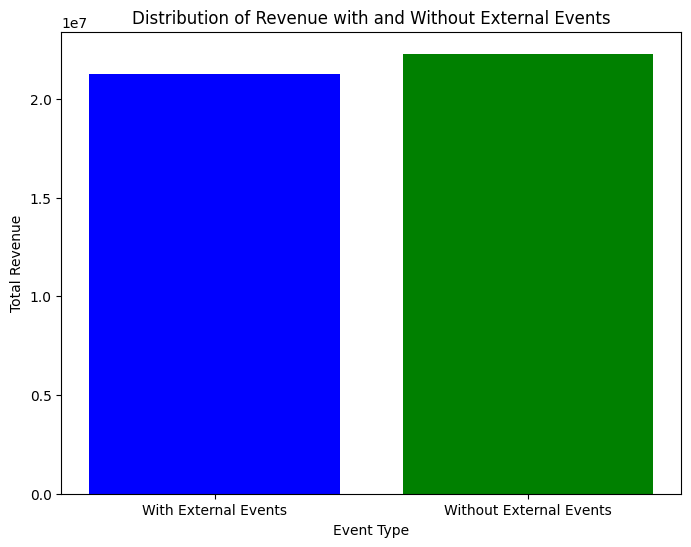

In [ ]:
data_with_external_events = data[data['External_Events'] > 0]
data_without_external_events = data[data['External_Events'] == 0]
# Calculate total revenue with and without external events
total_revenue_with_events = data_with_external_events['Revenue'].sum()
total_revenue_without_events = data_without_external_events['Revenue'].sum()
revenue_data = [total_revenue_with_events, total_revenue_without_events]
event_labels = ['With External Events', 'Without External Events']
plt.figure(figsize=(8, 6))
plt.bar(event_labels, revenue_data, color=['blue', 'green'])
plt.xlabel('Event Type')
plt.ylabel('Total Revenue')
plt.title('Distribution of Revenue with and Without External Events')
print(f"Total Revenue During External Events: {total_revenue_with_events}")
print(f"Total Revenue Without External Events: {total_revenue_without_events}")
plt.show()



⏫Revenue is **Higher** Without any External



<Figure size 800x500 with 0 Axes>

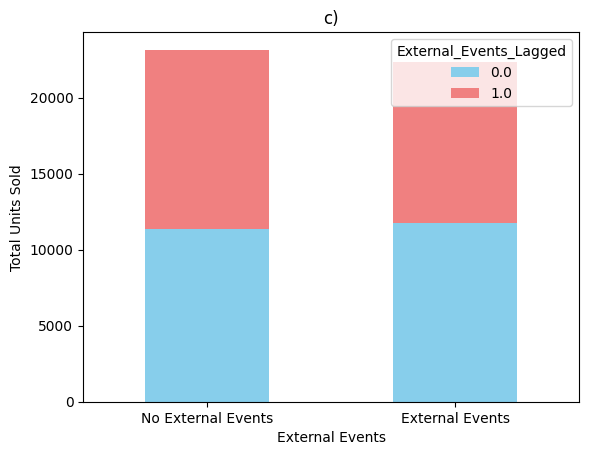

In [ ]:
# Create a lagged version of the 'External_Events' column
data['External_Events_Lagged'] = data['External_Events'].shift(1)
plt.figure(figsize=(8, 5))
data.groupby(['External_Events', 'External_Events_Lagged'])['Units_Sold'].sum().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('c)')
plt.xlabel('External Events')
plt.ylabel('Total Units Sold')
plt.xticks(ticks=[0, 1], labels=['No External Events', 'External Events'], rotation=0)
plt.show()


⏫External Events lagged That means After the Occurance of External events as some external events Have impact after some Period

In [ ]:
data['YearMonth'] = data['Order_Date'].dt.to_period('M')
max_units_month = data.groupby('YearMonth')['Units_Sold'].sum().idxmax()
max_units_count = data.groupby('YearMonth')['Units_Sold'].sum().max()
min_units_month = data.groupby('YearMonth')['Units_Sold'].sum().idxmin()
min_units_count = data.groupby('YearMonth')['Units_Sold'].sum().min()
print(f"Month with the Highest Units Sold: {max_units_month}, Count: {max_units_count}")
print(f"Month with the Lowest Units Sold: {min_units_month}, Count: {min_units_count}")

Month with the Highest Units Sold: 2020-12, Count: 1124
Month with the Lowest Units Sold: 2018-02, Count: 688


<ipython-input-190-6badff4def71>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Category', data=aug_2022_counts, palette='viridis', estimator=sum)


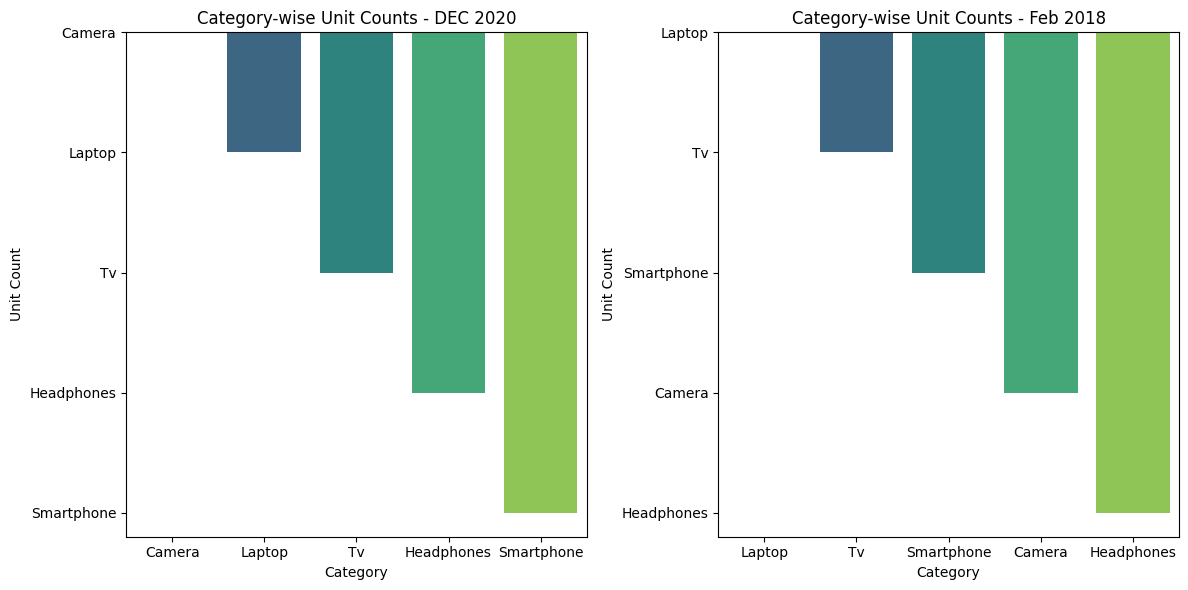

In [ ]:
# Convert 'Order_Date' column to datetime
data['Date'] = pd.to_datetime(data['Order_Date'])

# Filter data for August 2022 and January 2020
aug_2022 = data[(data['Date'].dt.month == 12) & (data['Date'].dt.year == 2020)]
jan_2020 = data[(data['Date'].dt.month == 2) & (data['Date'].dt.year == 2018)]

# Count units sold by category for each month
aug_2022_counts = aug_2022['Category'].value_counts().reset_index()
jan_2020_counts = jan_2020['Category'].value_counts().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Subplot for August 2022
plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Category', data=aug_2022_counts, palette='viridis', estimator=sum)
plt.title('Category-wise Unit Counts - DEC 2020')
plt.xlabel('Category')
plt.ylabel('Unit Count')

# Subplot for January 2020
plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Category', hue='Category', data=jan_2020_counts, palette='viridis', estimator=sum, legend=False)
plt.title('Category-wise Unit Counts - Feb 2018')
plt.xlabel('Category')
plt.ylabel('Unit Count')

plt.tight_layout()
plt.show()

Total Revenue for Max_Units: 1120236
Total Revenue for January 2020: 996555


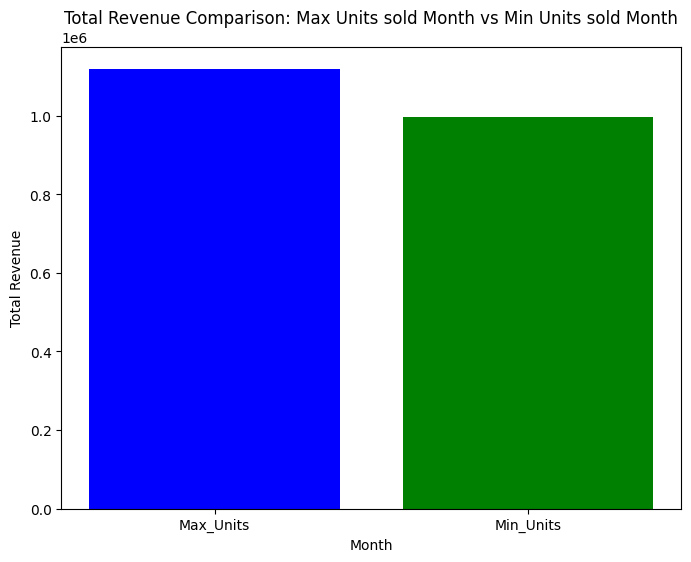

In [ ]:
#Revenue Genrated in aug 2022 and jan 2020
data['YearMonth'] = data['Order_Date'].dt.to_period('M')
max_month = data[data['YearMonth'] == '2020-12']
min_month = data[data['YearMonth'] == '2018-01']
total_revenue_max_units = max_month['Revenue'].sum()
total_revenue_min_units = min_month['Revenue'].sum()
print(f"Total Revenue for Max_Units: {total_revenue_max_units}")
print(f"Total Revenue for January 2020: {total_revenue_min_units}")
months = ['Max_Units', 'Min_Units']
revenues = [total_revenue_max_units, total_revenue_min_units]
plt.figure(figsize=(8, 6))
plt.bar(months, revenues, color=['blue', 'green'])
plt.title('Total Revenue Comparison: Max Units sold Month vs Min Units sold Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

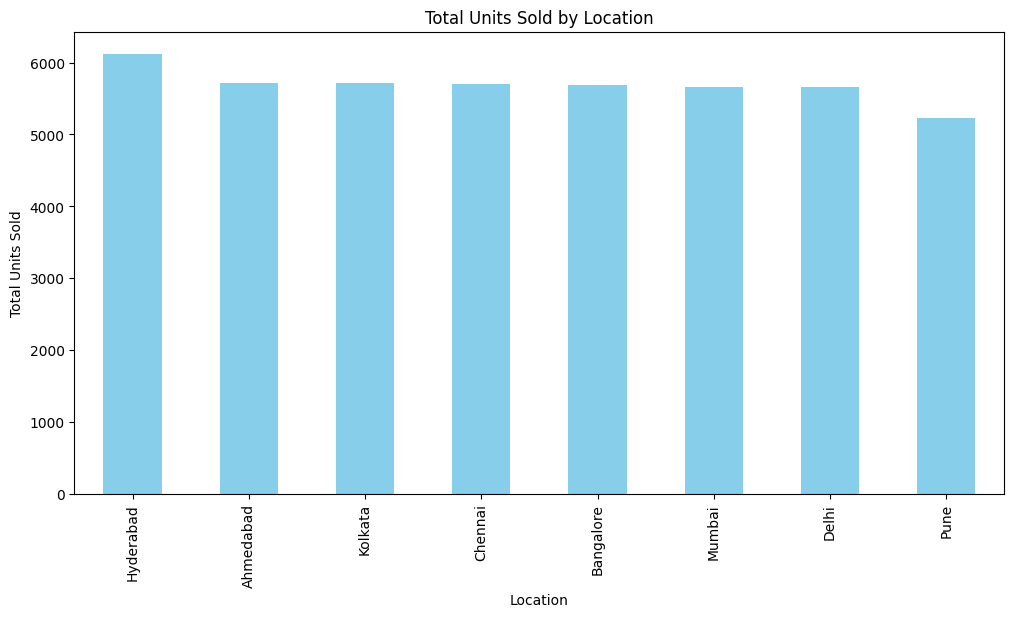

In [ ]:
# Group by location and sum units sold
units_sold_by_location = data.groupby('Location')['Units_Sold'].sum()

# Plotting the bar plot for units sold by location
plt.figure(figsize=(12, 6))
units_sold_by_location.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Units Sold by Location')
plt.xlabel('Location')
plt.ylabel('Total Units Sold')
plt.show()

⏫ Hyderbad Having Highest Units Sold Compared to Other Cities Where Pune Having Lowest Compared to other cities

In [ ]:
!pip install waterfallcharts

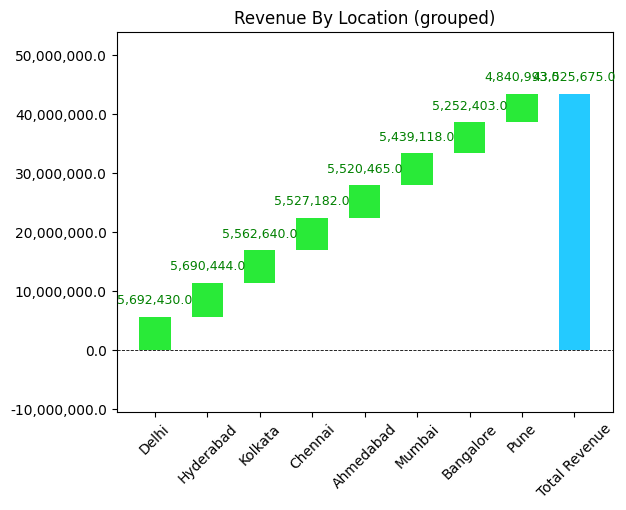

In [ ]:
import waterfall_chart
# Group the data by location and calculate the total revenue generated by each location
revenue_by_location = data.groupby('Location')['Revenue'].sum().reset_index()
#sorting data in dec
revenue_by_location = revenue_by_location.sort_values(by='Revenue', ascending=False)
waterfall_chart.plot(revenue_by_location['Location'], revenue_by_location['Revenue'], net_label='Total Revenue')
plt.title('Revenue By Location (grouped)')
plt.xticks(rotation=45)
plt.show()


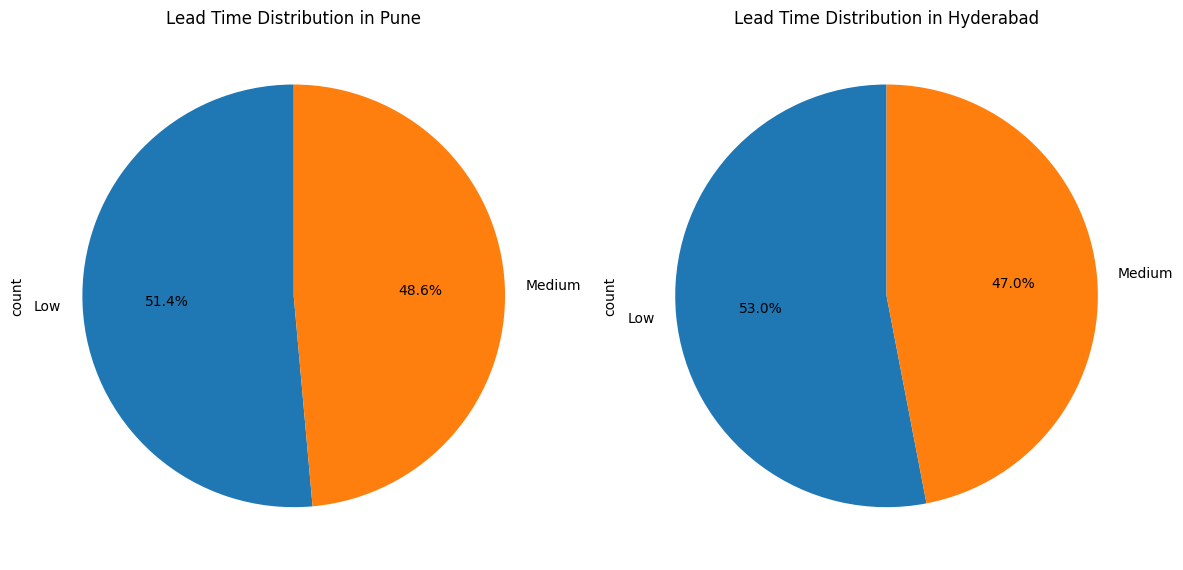

In [ ]:
# Grouping Lead_Time into categories
def categorize_lead_time(lead_time):
    if lead_time in range(1, 3):
        return 'Low'
    elif lead_time in range(3, 7):
        return 'Medium'
    elif lead_time in range(7, 11):
        return 'High'
    else:
        return 'Other'

# Applying the categorization to the data
data['Lead_Time_Category'] = data['Lead_Time'].apply(categorize_lead_time)

# Extract data for Pune and Hyderabad
pune_data = data[data['Location'] == 'Pune']
hyderabad_data = data[data['Location'] == 'Hyderabad']

# Plotting pie chart for Lead_Time categories in Pune
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pune_data['Lead_Time_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Lead Time Distribution in Pune')

# Plotting pie chart for Lead_Time categories in Hyderabad
plt.subplot(1, 2, 2)
hyderabad_data['Lead_Time_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Lead Time Distribution in Hyderabad')

plt.tight_layout()
plt.show()


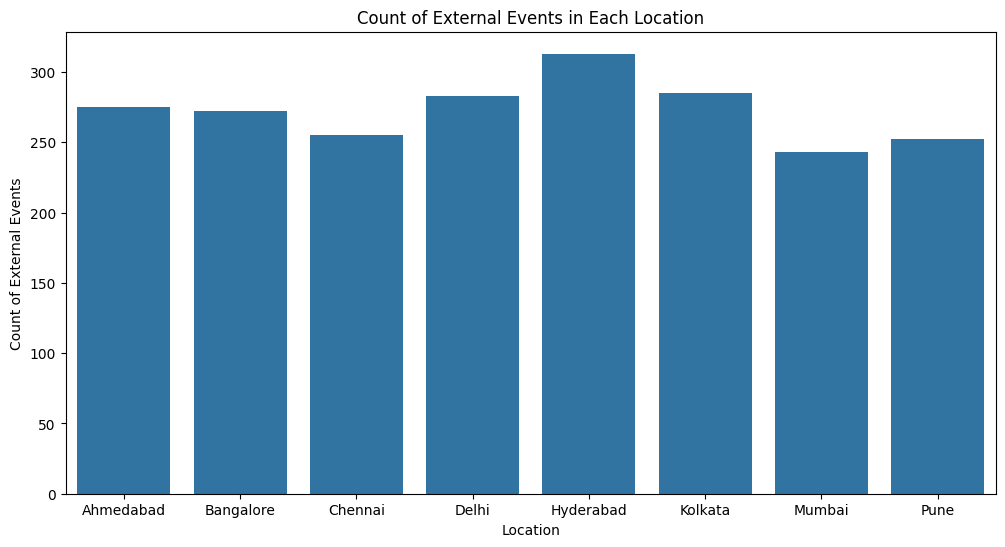

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'Location' and 'External_Events' are columns in your dataset
external_events_by_location = data.groupby('Location')['External_Events'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='External_Events', data=external_events_by_location)
plt.title('Count of External Events in Each Location')
plt.xlabel('Location')
plt.ylabel('Count of External Events')
plt.show()

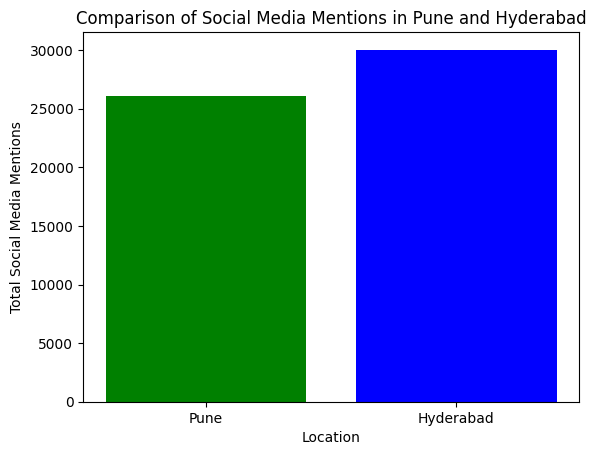

In [ ]:
# Filtered dataset for Pune
pune_data = data[data['Location'] == 'Pune']
# Filtered dataset for Hyderabad
hyderabad_data = data[data['Location'] == 'Hyderabad']
# Calculate total social media mentions for each city
total_mentions_pune = pune_data['Social_Media_Mentions'].sum()
total_mentions_hyderabad = hyderabad_data['Social_Media_Mentions'].sum()
locations = ['Pune', 'Hyderabad']
total_mentions = [total_mentions_pune, total_mentions_hyderabad]
plt.bar(locations, total_mentions, color=['green', 'blue'])
plt.xlabel('Location')
plt.ylabel('Total Social Media Mentions')
plt.title('Comparison of Social Media Mentions in Pune and Hyderabad')
plt.show()



⏫ As you can see Here Pune Has Less Number of Social Media Mnetions compared To Hyderabad That'S Might be the Reason Behind Less Number Of Units Sold

In [ ]:
# Filtered dataset for Hyderabad
hyderabad_data = data[data['Location'] == 'Hyderabad']
# Calculate product popularity in Hyderabad by category
category_popularity = hyderabad_data.groupby('Category')['Units_Sold'].sum()
category_popularity = category_popularity.sort_values(ascending=False)
print("Product Popularity in Hyderabad by Category:")
print(category_popularity)

Product Popularity in Hyderabad by Category:
Category
Laptop        1462
Smartphone    1287
Headphones    1257
Camera        1120
Tv            1000
Name: Units_Sold, dtype: int64


In [ ]:
# Most Number of Products sold in each city
most_sold_products_by_location = data.groupby(['Location', 'Product_Name'])['Units_Sold'].sum().reset_index()
most_sold_products_by_location = most_sold_products_by_location.loc[most_sold_products_by_location.groupby('Location')['Units_Sold'].idxmax()]
print(most_sold_products_by_location)


      Location                 Product_Name  Units_Sold
9    Ahmedabad              Samsung QLED TV         542
15   Bangalore  Canon EOS Rebel DSLR Camera         510
37     Chennai                OnePlus 9 Pro         501
54       Delhi              Samsung QLED TV         488
61   Hyderabad                     Dell XPS         605
83     Kolkata           Samsung Galaxy S21         458
95      Mumbai               Lenovo IdeaPad         528
105       Pune  Canon EOS Rebel DSLR Camera         481


⏫Mostly Purchased Products In Diffeerent Regions As No Region Have similar Products To comapre with each other

In [ ]:
# Convert 'Order_Date' and 'Delivery_Date' to datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Delivery_Date'] = pd.to_datetime(data['Delivery_Date'])
print(data.dtypes)

Product_ID                        object
Product_Name                      object
Category                          object
Units_Sold                         int64
Revenue                            int64
Order_Date                datetime64[ns]
Delivery_Date             datetime64[ns]
Inventory_Level                    int64
Customer_ID                       object
Season                            object
Holiday                            int64
Location                          object
Lead_Time                          int64
Supplier_Performance             float64
Social_Media_Mentions              int64
External_Events                    int64
Quality_Control                   object
Price                              int64
External_Events_Lagged           float64
YearMonth                      period[M]
Date                      datetime64[ns]
Lead_Time_Category                object
dtype: object


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Categorical columns
categorical_columns = ['Category', 'Location', 'Season']
# Ordinal columns
ordinal_columns = ['Quality_Control']
# One-hot encoding for categorical columns
data_onehot = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
# Concatenate one-hot encoded columns with the original DataFrame
data = pd.concat([data, data_onehot], axis=1)
# Label encoding for ordinal columns
label_encoder = LabelEncoder()
for column in ordinal_columns:
    data[column] = label_encoder.fit_transform(data[column])
# Checking the updated DataFrame
print(data.head())

  Product_ID                 Product_Name    Category  Units_Sold  Revenue  \
0      TV001                   LG OLED TV          Tv          12    17988   
1      SP002                    iPhone 12  Smartphone          12    11988   
2      LT002                     Dell XPS      Laptop          17    22083   
3      TV003          Sony BRAVIA OLED TV          Tv          14    25186   
4     CAM001  Canon EOS Rebel DSLR Camera      Camera          17    13583   

  Order_Date Delivery_Date  Inventory_Level Customer_ID   Season  ...  \
0 2018-01-01    2018-01-05              180    Cust_882  January  ...   
1 2018-01-02    2018-01-05               95    Cust_247  January  ...   
2 2018-01-02    2018-01-05              120    Cust_448  January  ...   
3 2018-01-02    2018-01-05              191    Cust_319  January  ...   
4 2018-01-02    2018-01-06               55    Cust_641  January  ...   

   Season_December Season_February  Season_January  Season_July  Season_June  \
0           

⏫One Hot Encoding & Label Encoding is to convert the categorical Columns into Numerical Columns Which can feed into ML Models

In [ ]:
data['Day'] = data['Order_Date'].dt.day
data['Month'] = data['Order_Date'].dt.month
data['Year'] = data['Order_Date'].dt.year
data['DayOfWeek'] = data['Order_Date'].dt.dayofweek
data['Quarter'] = data['Order_Date'].dt.quarter

In [ ]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data = data.sort_values(by='Order_Date')
# Creating lag features for 'Units_Sold'
data['Units_Sold_Lag_1'] = data.groupby('Product_ID')['Units_Sold'].shift(1)
data['Units_Sold_Lag_2'] = data.groupby('Product_ID')['Units_Sold'].shift(2)
data['Units_Sold_Lag_3'] = data.groupby('Product_ID')['Units_Sold'].shift(3)
# Droping rows with missing values due to lag
data = data.dropna()
print(data.head())

   Product_ID                 Product_Name    Category  Units_Sold  Revenue  \
16     CAM001  Canon EOS Rebel DSLR Camera      Camera          11     8789   
20      SP002                    iPhone 12  Smartphone           5     4995   
23      LT002                     Dell XPS      Laptop          15    19485   
25      SP002                    iPhone 12  Smartphone           2     1998   
26      LT002                     Dell XPS      Laptop           7     9093   

   Order_Date Delivery_Date  Inventory_Level Customer_ID   Season  ...  \
16 2018-01-06    2018-01-09               70    Cust_922  January  ...   
20 2018-01-07    2018-01-08              157    Cust_479  January  ...   
23 2018-01-07    2018-01-11               93    Cust_285  January  ...   
25 2018-01-08    2018-01-09              132    Cust_437  January  ...   
26 2018-01-08    2018-01-11              193    Cust_142  January  ...   

    Season_October Season_September  Day  Month  Year  DayOfWeek  Quarter  \
16 

In [ ]:
data['Expected_Delivery_Date'] = data['Order_Date'] + pd.to_timedelta(data['Lead_Time'], unit='D')

In [ ]:
data['Units_Sold_Lagged'] = data['Units_Sold'].shift(1)
data['Revenue_Lagged'] = data['Revenue'].shift(1)

In [ ]:
import numpy as np
data['External_Events_Impact'] = np.where(data['External_Events'] > 0, 1, 0)

⏫Feature Engineering & Creating Lag Features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Units_Sold', axis=1), data['Units_Sold'], test_size=0.2, random_state=42)

⏫Splitting Data into Testing and Training

In [ ]:
!pip install statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

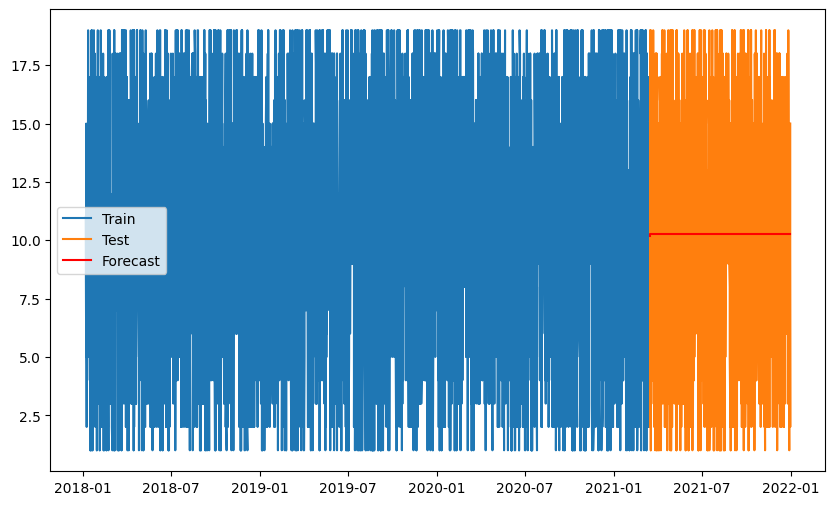

Mean Absolute Error: 4.644612809510842
Mean Squared Error: 29.046772934413884
Root Mean Squared Error: 5.389505815417021


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Modify the selected columns based on the actual column names
selected_columns = [
    'Units_Sold', 'Product_Name','Revenue','Location',
    'Lead_Time','Supplier_Performance',
    'Social_Media_Mentions', 'External_Events',
    'Holiday',
    'Quality_Control','Order_Date','Category'
]

# Create a copy of the DataFrame with selected columns
data_selected = data[selected_columns].copy()

# Sort the DataFrame by 'Order_Date'
data_selected.sort_values('Order_Date', inplace=True)

# Set 'Order_Date' as the index
data_selected.set_index('Order_Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data_selected) * 0.8)
train, test = data_selected.iloc[:train_size], data_selected.iloc[train_size:]

# Define ARIMA parameters
order = (1, 0, 1)  # ARIMA(p, d, q)

# Fit ARIMA model
arima_model = ARIMA(train['Units_Sold'], order=order)
arima_result = arima_model.fit()

# Make forecast
forecast = arima_result.forecast(steps=len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Units_Sold'], label='Train')
plt.plot(test.index, test['Units_Sold'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()

# Evaluating the model
mae = mean_absolute_error(test['Units_Sold'], forecast)
mse = mean_squared_error(test['Units_Sold'], forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

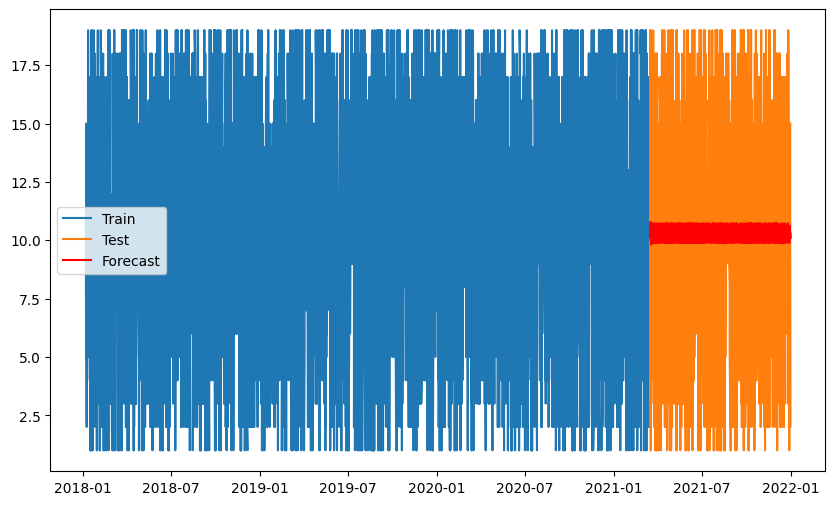

Mean Absolute Error: 4.648010454521443
Mean Squared Error: 29.106318154242803
Root Mean Squared Error: 5.395027168999504


In [ ]:
#sarima model
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Modify the selected columns based on the actual column names
selected_columns = [
    'Units_Sold', 'Product_Name', 'Revenue','Location',
    'Lead_Time','Supplier_Performance',
    'Social_Media_Mentions', 'External_Events',
    'Holiday',
    'Quality_Control','Order_Date','Category'
]

# Create a copy of the DataFrame with selected columns
data_selected = data[selected_columns].copy()

# Sort the DataFrame by 'Order_Date'
data_selected.sort_values('Order_Date', inplace=True)

# Set 'Order_Date' as the index
data_selected.set_index('Order_Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data_selected) * 0.8)
train, test = data_selected.iloc[:train_size], data_selected.iloc[train_size:]

# Define SARIMA parameters
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 12)

# Fit SARIMA model
sarima_model = SARIMAX(train['Units_Sold'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Make forecast
forecast = sarima_result.get_forecast(steps=len(test))

# Extract forecasted values
forecast_values = forecast.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Units_Sold'], label='Train')
plt.plot(test.index, test['Units_Sold'], label='Test')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.legend()
plt.show()

# Evaluating the model
mae = mean_absolute_error(test['Units_Sold'], forecast_values)
mse = mean_squared_error(test['Units_Sold'], forecast_values)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

target = 'Units_Sold'
features = ['Revenue','Inventory_Level','Lead_Time','Social_Media_Mentions','External_Events']
# Assuming you've already defined X and y
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if features exist in the DataFrame
if not all(feature in X_train.columns for feature in features):
    missing_features = set(features) - set(X_train.columns)
    raise ValueError(f"Features not found in DataFrame: {missing_features}")

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Rest of the code for XGBoost training and evaluation

params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 3,                    # Maximum depth of the tree
    'learning_rate': 0.1,              # Step size shrinkage to prevent overfitting
    'subsample': 0.8,                  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,           # Subsample ratio of columns when constructing each tree
    'n_estimators': 100                # Number of boosting rounds
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 2.334662667865103
Mean Squared Error: 29.106318154242803
Root Mean Squared Error: 5.395027168999504


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
temp_col = data['Category'].copy()
data.drop(columns=['Category'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming 'data' is your DataFrame
# Selecting the columns for the model
selected_columns = [
    'Units_Sold', 'Revenue', 'Inventory_Level', 'Price', 'Holiday', 'Lead_Time',
    'Supplier_Performance', 'Social_Media_Mentions', 'External_Events'
]

# Create a copy of the DataFrame with selected columns
data_selected = data[selected_columns].copy()

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Units_Sold', axis=1)
y = data_selected['Units_Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest Mean Absolute Error: {rf_mae}')


Random Forest Mean Absolute Error: 0.00870454545454544


In [ ]:
data['Category'] = temp_col

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = pd.read_csv('/content/sales_dataset.csv', dayfirst=True, parse_dates=['Order_Date'])

target_column = 'Units_Sold'

# Define the start date for forecasting
forecast_start_date = pd.to_datetime('2022-11-01')

# Create an empty list to store the forecasts
forecast_data = []

# Iterate through unique categories, locations, and product IDs
for category in df['Category'].unique():
    for location in df['Location'].unique():
        for product_id in df['Product_ID'].unique():
            # Filter the dataset for the current category, location, and product
            subset_df = df[(df['Category'] == category) & (df['Location'] == location) & (df['Product_ID'] == product_id)]

            # Check if there are enough data points for forecasting
            if len(subset_df) > 1:  # Add this condition
                # Standardize the 'Units_Sold' column to improve numerical stability
                scaler = StandardScaler()
                subset_df.loc[:, target_column] = scaler.fit_transform(subset_df[[target_column]])

                # Set 'Order_Date' as index
                subset_df.set_index('Order_Date', inplace=True)

                # SARIMA model training
                order = (1, 0, 1)  # ARIMA order parameters
                seasonal_order = (1, 1, 1, 12)  # Seasonal order parameters
                sarima_model = SARIMAX(subset_df[target_column], order=order, seasonal_order=seasonal_order)

                # Fit the SARIMAX model
                sarima_result = sarima_model.fit(disp=False)

                # Forecast for each date
                forecast_steps = 1
                forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='MS')
                forecast_values = scaler.inverse_transform(sarima_result.get_forecast(steps=forecast_steps).predicted_mean.values.reshape(-1, 1)).round().astype(int)

                # Append the forecast data to the list
                for i in range(forecast_steps):
                    forecast_data.append({
                        'Product_ID': product_id,
                        'Product_Name': subset_df['Product_Name'].iloc[0],  # Assumes the name is constant for a product
                        'Category': category,
                        'Location': location,
                        'Forecast_Date': forecast_dates[i].strftime('%Y-%m-%d'),
                        'Estimated_Units_Sold': forecast_values[i][0]
                    })

# Convert the list of dictionaries into a DataFrame
forecast_df = pd.DataFrame(forecast_data)

# Save the forecast results to a CSV file
forecast_df.to_csv('forecast_results_for_sarima.csv', index=False)

# Display the forecast DataFrame
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

    Product_ID                         Product_Name    Category   Location  \
0        TV001                           LG OLED TV          Tv  Ahmedabad   
1        TV003                  Sony BRAVIA OLED TV          Tv  Ahmedabad   
2        TV002                      Samsung QLED TV          Tv  Ahmedabad   
3        TV001                           LG OLED TV          Tv      Delhi   
4        TV003                  Sony BRAVIA OLED TV          Tv      Delhi   
..         ...                                  ...         ...        ...   
115      HP003           JBL Quantum Gaming Headset  Headphones  Hyderabad   
116      HP001                         boAt Rockerz  Headphones  Hyderabad   
117      HP002  Sony WH-1000XM4 Wireless Headphones  Headphones    Chennai   
118      HP003           JBL Quantum Gaming Headset  Headphones    Chennai   
119      HP001                         boAt Rockerz  Headphones    Chennai   

    Forecast_Date  Estimated_Units_Sold  
0      2022-11-01    

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd

# Load the forecasted data
forecast_df = pd.read_csv('/content/forecast_results_for_sarima.csv')

# Group by 'Product_Name', 'Location', and 'Category', summing the 'Units_Sold'
merged_forecast_df = forecast_df.groupby(['Product_Name', 'Location', 'Category']).agg({'Product_ID': 'first', 'Estimated_Units_Sold': 'sum'}).reset_index()

# Display the merged DataFrame before updating Product IDs
print("Merged DataFrame before updating Product IDs:")
print(merged_forecast_df.head())

# Merge the product IDs based on 'Product_Name'
merged_forecast_df['Product_ID'] = merged_forecast_df.groupby('Product_Name')['Product_ID'].transform('first')

# Drop duplicate rows to keep only one row per unique product name, location, and category combination
merged_forecast_df.drop_duplicates(subset=['Product_Name', 'Location', 'Category'], inplace=True)

# Display the merged DataFrame after updating Product IDs
print("\nMerged DataFrame after updating Product IDs:")
print(merged_forecast_df.head())

# Save the merged forecasted data to a new CSV file
merged_forecast_df.to_csv('/content/Sarima_forecast.csv', index=False)


Merged DataFrame before updating Product IDs:
                  Product_Name   Location Category Product_ID  \
0  Canon EOS Rebel DSLR Camera  Ahmedabad   Camera     CAM001   
1  Canon EOS Rebel DSLR Camera  Bangalore   Camera     CAM001   
2  Canon EOS Rebel DSLR Camera    Chennai   Camera     CAM001   
3  Canon EOS Rebel DSLR Camera      Delhi   Camera     CAM001   
4  Canon EOS Rebel DSLR Camera  Hyderabad   Camera     CAM001   

   Estimated_Units_Sold  
0                     8  
1                     9  
2                     9  
3                     8  
4                     4  

Merged DataFrame after updating Product IDs:
                  Product_Name   Location Category Product_ID  \
0  Canon EOS Rebel DSLR Camera  Ahmedabad   Camera     CAM001   
1  Canon EOS Rebel DSLR Camera  Bangalore   Camera     CAM001   
2  Canon EOS Rebel DSLR Camera    Chennai   Camera     CAM001   
3  Canon EOS Rebel DSLR Camera      Delhi   Camera     CAM001   
4  Canon EOS Rebel DSLR Camera  Hyde

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/sales_dataset.csv', dayfirst=True, parse_dates=['Order_Date'])

# Specify the target column
target_column = 'Units_Sold'

# Define the start date for forecasting
forecast_start_date = pd.to_datetime('2022-11-01')

# Create an empty list to store the forecast results
forecast_results = []

# Iterate through unique categories, locations, and product IDs
for category in df['Category'].unique():
    for location in df['Location'].unique():
        for product_id in df['Product_ID'].unique():
            # Filter the dataset for the current category, location, and product
            subset_df = df[(df['Category'] == category) & (df['Location'] == location) & (df['Product_ID'] == product_id)]

            # Check if there are enough data points for forecasting
            if len(subset_df) > 1:
                # Standardize the 'Units_Sold' column to improve numerical stability
                scaler = StandardScaler()
                subset_df.loc[:, target_column] = scaler.fit_transform(subset_df[[target_column]])

                # Set 'Order_Date' as index
                subset_df.set_index('Order_Date', inplace=True)

                # ARIMA model training
                order = (1, 0, 1)  # ARIMA order parameters
                arima_model = ARIMA(subset_df[target_column], order=order)

                # Fit the ARIMA model
                arima_result = arima_model.fit()

                # Forecast for each date
                forecast_steps = 1
                forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='MS')
                forecast_values = scaler.inverse_transform(arima_result.forecast(steps=forecast_steps).values.reshape(-1, 1)).round().astype(int)

                # Append the forecast data to the list
                for i in range(forecast_steps):
                    forecast_results.append({
                        'Product_ID': product_id,
                        'Product_Name': subset_df['Product_Name'].iloc[0],  # Assumes the name is constant for a product
                        'Category': category,
                        'Location': location,
                        'Forecast_Date': forecast_dates[i].strftime('%Y-%m-%d'),
                        'Estimated_Units_Sold': forecast_values[i][0]
                    })

# Create a DataFrame from the forecast results list
forecast_df = pd.DataFrame(forecast_results)

# Save the forecast results to a CSV file
forecast_df.to_csv('forecast_results_for_arima.csv', index=False)

# Display the forecast DataFrame
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

    Product_ID                         Product_Name    Category   Location  \
0        TV001                           LG OLED TV          Tv  Ahmedabad   
1        TV003                  Sony BRAVIA OLED TV          Tv  Ahmedabad   
2        TV002                      Samsung QLED TV          Tv  Ahmedabad   
3        TV001                           LG OLED TV          Tv      Delhi   
4        TV003                  Sony BRAVIA OLED TV          Tv      Delhi   
..         ...                                  ...         ...        ...   
115      HP003           JBL Quantum Gaming Headset  Headphones  Hyderabad   
116      HP001                         boAt Rockerz  Headphones  Hyderabad   
117      HP002  Sony WH-1000XM4 Wireless Headphones  Headphones    Chennai   
118      HP003           JBL Quantum Gaming Headset  Headphones    Chennai   
119      HP001                         boAt Rockerz  Headphones    Chennai   

    Forecast_Date  Estimated_Units_Sold  
0      2022-11-01    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd

# Load the forecasted data
forecast_df = pd.read_csv('/content/forecast_results_for_arima.csv')

# Group by 'Product_Name' and 'Location', summing the 'Units_Sold'
merged_forecast_df = forecast_df.groupby(['Product_Name', 'Location','Category']).agg({'Product_ID': 'first', 'Estimated_Units_Sold': 'sum'}).reset_index()

# Display the merged DataFrame before updating Product IDs
print("Merged DataFrame before updating Product IDs:")
print(merged_forecast_df.head())

# Update the product IDs based on the first occurrence of each product name
merged_forecast_df['Product_ID'] = merged_forecast_df.groupby('Product_Name')['Product_ID'].transform('first')

# Display the merged DataFrame after updating Product IDs
print("\nMerged DataFrame after updating Product IDs:")
print(merged_forecast_df.head())

# Save the merged forecasted data to a new CSV file
merged_forecast_df.to_csv('/content/arima_forecast.csv', index=False)


Merged DataFrame before updating Product IDs:
                  Product_Name   Location Category Product_ID  \
0  Canon EOS Rebel DSLR Camera  Ahmedabad   Camera     CAM001   
1  Canon EOS Rebel DSLR Camera  Bangalore   Camera     CAM001   
2  Canon EOS Rebel DSLR Camera    Chennai   Camera     CAM001   
3  Canon EOS Rebel DSLR Camera      Delhi   Camera     CAM001   
4  Canon EOS Rebel DSLR Camera  Hyderabad   Camera     CAM001   

   Estimated_Units_Sold  
0                    10  
1                    11  
2                     8  
3                    10  
4                    12  

Merged DataFrame after updating Product IDs:
                  Product_Name   Location Category Product_ID  \
0  Canon EOS Rebel DSLR Camera  Ahmedabad   Camera     CAM001   
1  Canon EOS Rebel DSLR Camera  Bangalore   Camera     CAM001   
2  Canon EOS Rebel DSLR Camera    Chennai   Camera     CAM001   
3  Canon EOS Rebel DSLR Camera      Delhi   Camera     CAM001   
4  Canon EOS Rebel DSLR Camera  Hyde

In [ ]:
import pandas as pd

# Loading forecasts from SARIMA model
sarima_forecast_df = pd.read_csv('/content/Sarima_forecast.csv')
sarima_forecast_df.set_index(['Product_Name', 'Location'], inplace=True)

# Loading forecasts from ARIMA model
arima_forecast_df = pd.read_csv('/content/arima_forecast.csv')
arima_forecast_df.set_index(['Product_Name', 'Location'], inplace=True)

# Defining weights for combining forecasts
sarima_weight = 0.3
arima_weight = 0.7

# Combine forecasts using weighted averaging
combined_forecast_df = (sarima_forecast_df['Estimated_Units_Sold'] * sarima_weight +
                        arima_forecast_df['Estimated_Units_Sold'] * arima_weight)

# Reset index to make it a DataFrame
combined_forecast_df = combined_forecast_df.reset_index()

# Save the combined forecast data to a new CSV file
print(combined_forecast_df.head())
combined_forecast_df.to_csv('/content/Final_forecast.csv', index=False)

                  Product_Name   Location  Estimated_Units_Sold
0  Canon EOS Rebel DSLR Camera  Ahmedabad                   9.4
1  Canon EOS Rebel DSLR Camera  Bangalore                  10.4
2  Canon EOS Rebel DSLR Camera    Chennai                   8.3
3  Canon EOS Rebel DSLR Camera      Delhi                   9.4
4  Canon EOS Rebel DSLR Camera  Hyderabad                   9.6


In [ ]:
# Load actual units sold from CSV
actual_df = pd.read_csv('/content/sales_dataset.csv')
actual_df.set_index(['Product_Name', 'Location'], inplace=True)

# Merge actual and combined forecast dataframes based on 'Product_Name' and 'Location'
merged_df = pd.merge(actual_df, combined_forecast_df, on=['Product_Name', 'Location'], suffixes=('_actual', '_forecast'))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(merged_df['Units_Sold'], merged_df['Estimated_Units_Sold'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['Units_Sold'], merged_df['Estimated_Units_Sold'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Absolute Error (MAE):", adjusted_mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.9499549954995494
Mean Squared Error (MSE): 34.44484698469847
Root Mean Squared Error (RMSE): 5.868973247911296


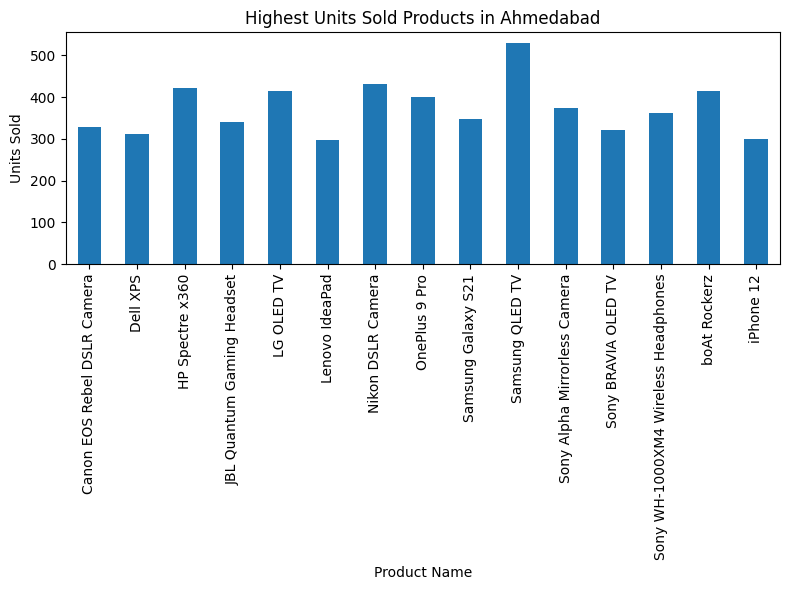

In Ahmedabad, the product with the highest number of units sold is Samsung QLED TV


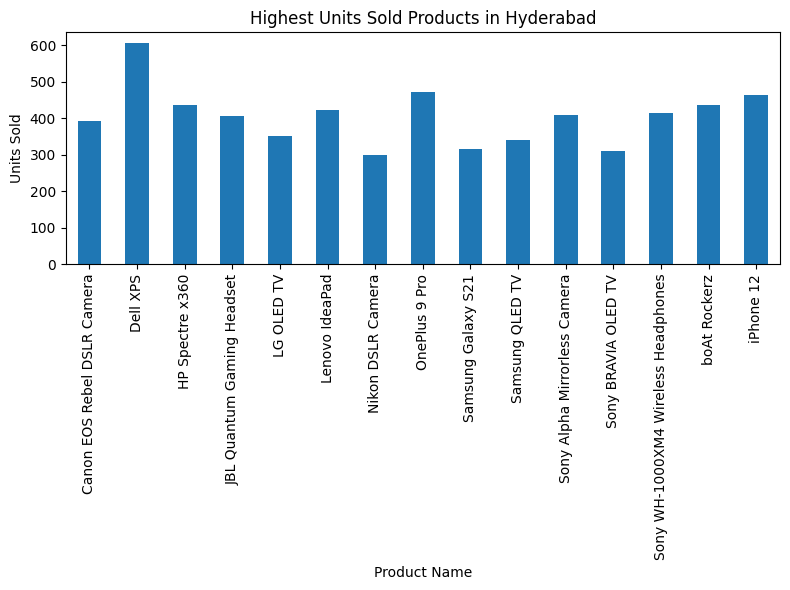

In Hyderabad, the product with the highest number of units sold is Dell XPS


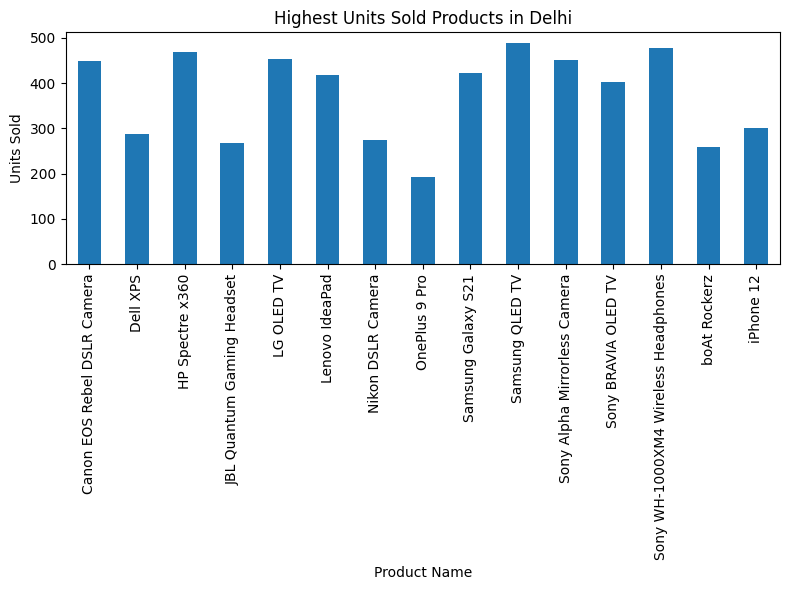

In Delhi, the product with the highest number of units sold is Samsung QLED TV


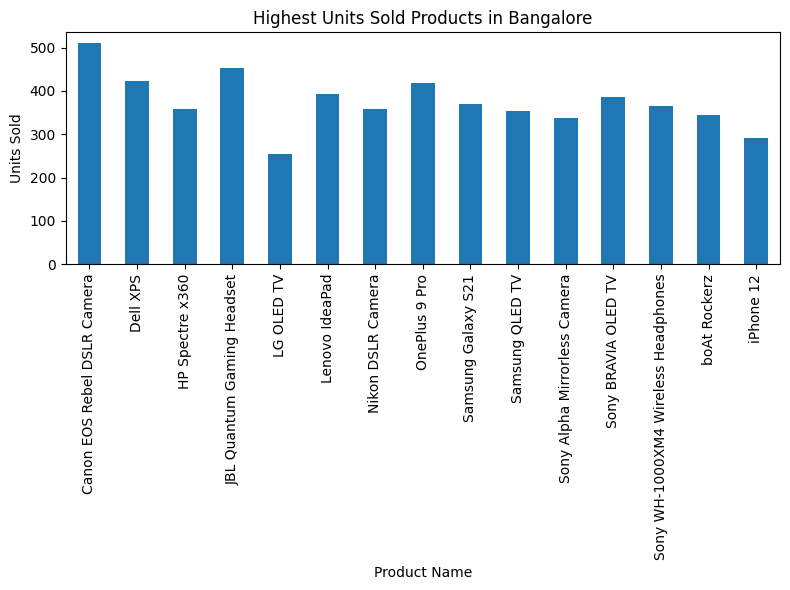

In Bangalore, the product with the highest number of units sold is Canon EOS Rebel DSLR Camera


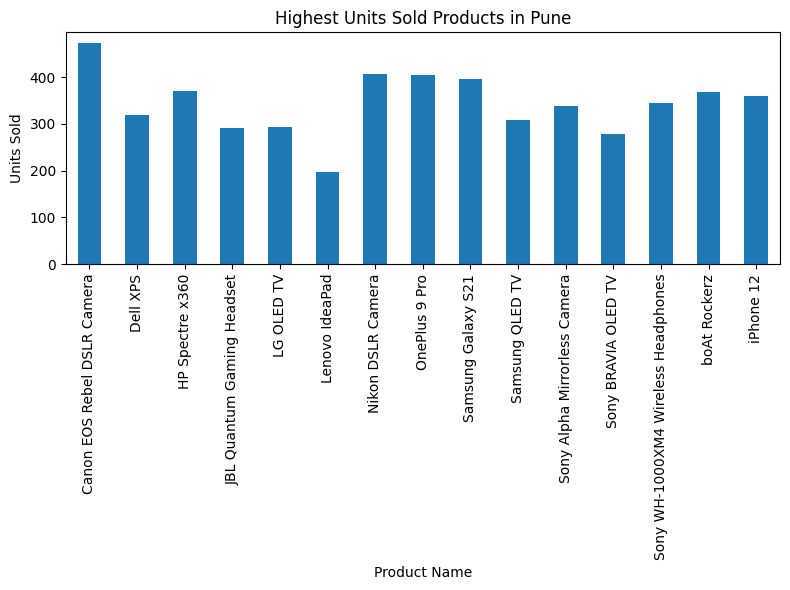

In Pune, the product with the highest number of units sold is Canon EOS Rebel DSLR Camera


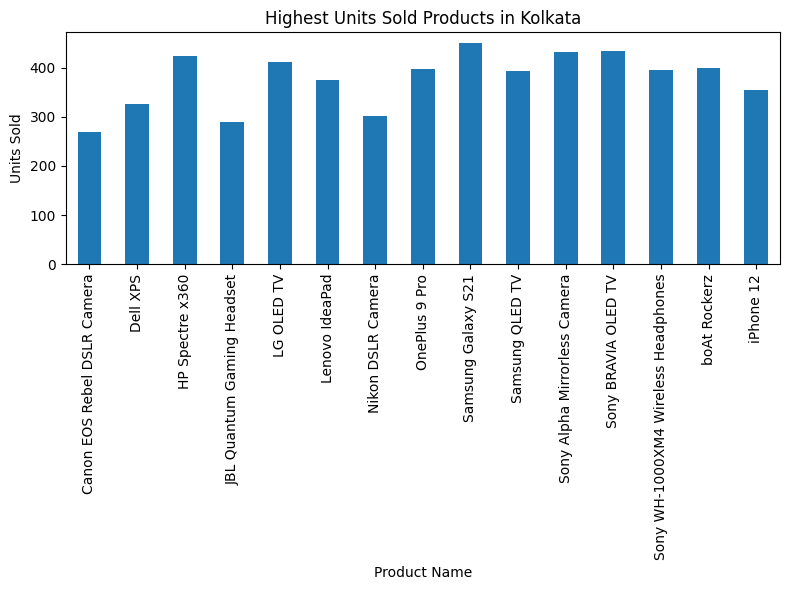

In Kolkata, the product with the highest number of units sold is Samsung Galaxy S21


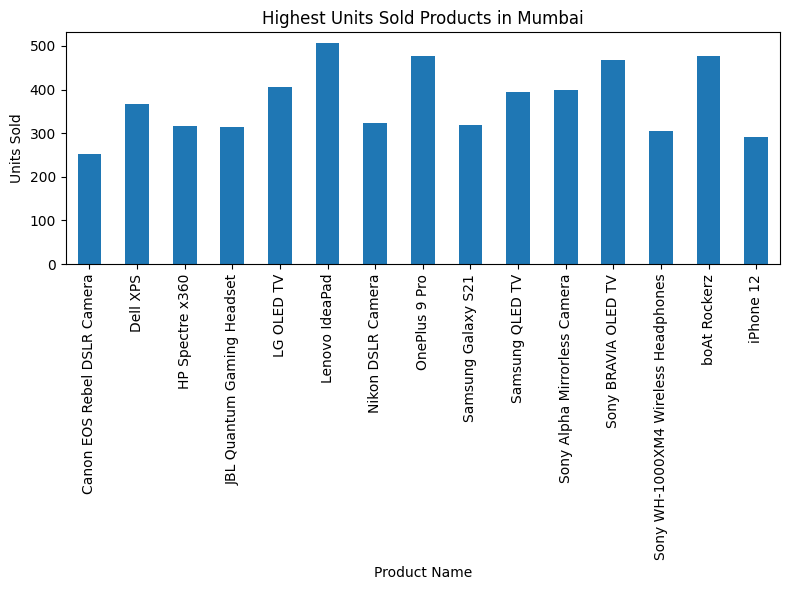

In Mumbai, the product with the highest number of units sold is Lenovo IdeaPad


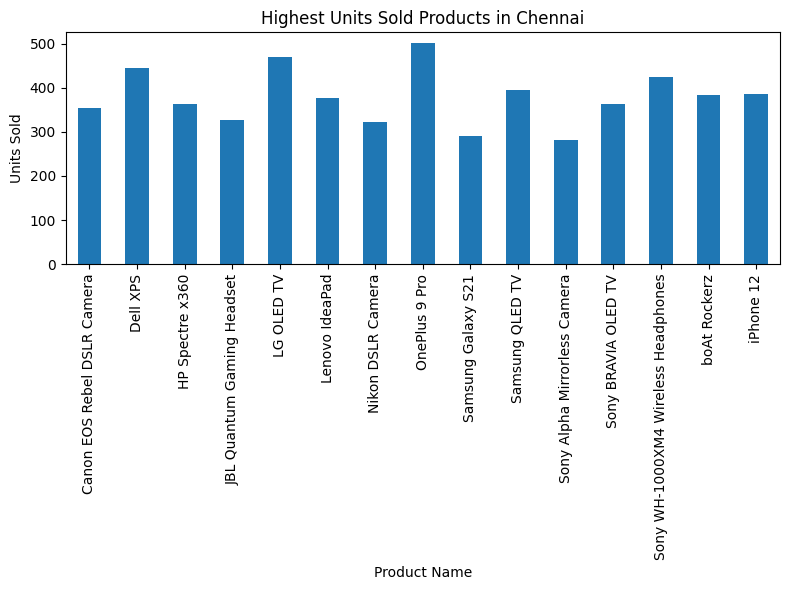

In Chennai, the product with the highest number of units sold is OnePlus 9 Pro


In [ ]:
import matplotlib.pyplot as plt

# Group data by location and product, then sum the units sold
location_product_units_sold = data.groupby(['Location', 'Product_Name'])['Units_Sold'].sum()

# Get the product with the highest units sold in each location
highest_units_products = location_product_units_sold.groupby('Location').idxmax().apply(lambda x: x[1])

# Plotting bar charts for each location
for location in data['Location'].unique():
    plt.figure(figsize=(8, 6))
    location_data = location_product_units_sold.loc[location]
    location_data.plot(kind='bar')
    plt.title(f'Highest Units Sold Products in {location}')
    plt.xlabel('Product Name')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print(f"In {location}, the product with the highest number of units sold is {highest_units_products[location]}")



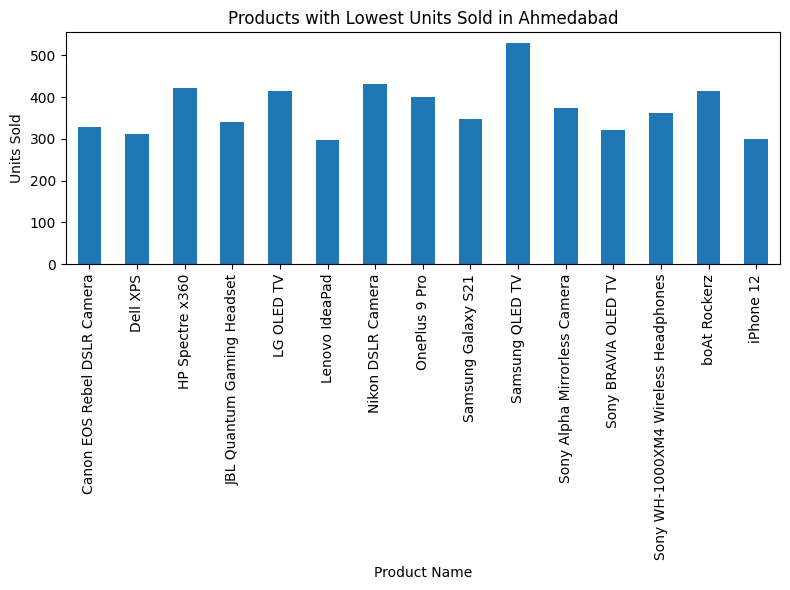

In Ahmedabad, the product with the lowest number of units sold is Lenovo IdeaPad


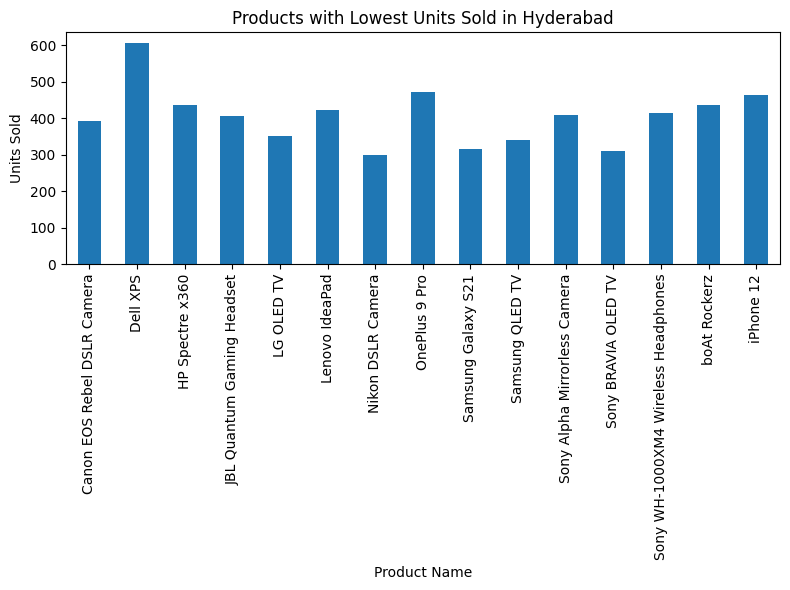

In Hyderabad, the product with the lowest number of units sold is Nikon DSLR Camera


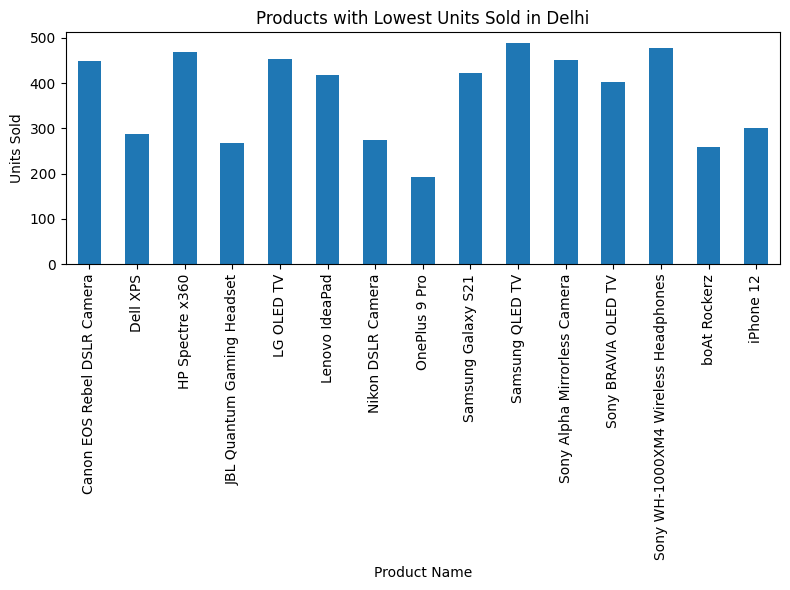

In Delhi, the product with the lowest number of units sold is OnePlus 9 Pro


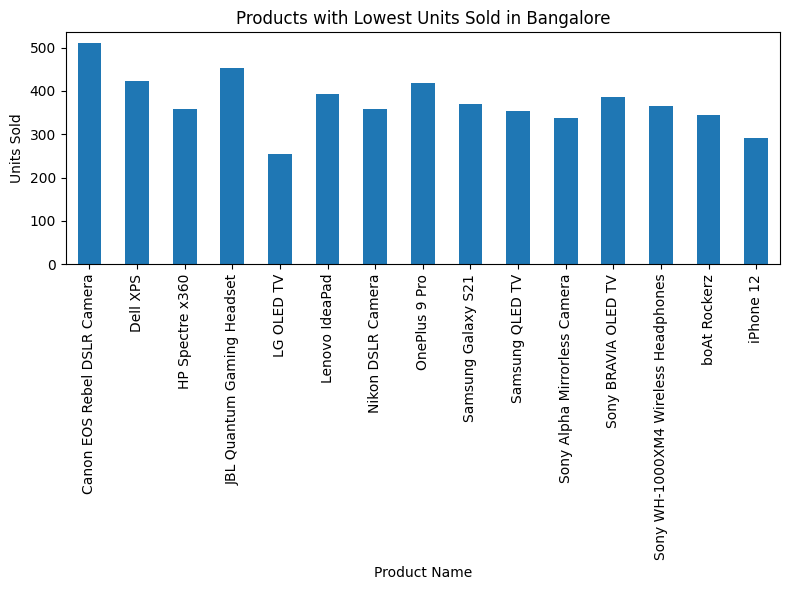

In Bangalore, the product with the lowest number of units sold is LG OLED TV


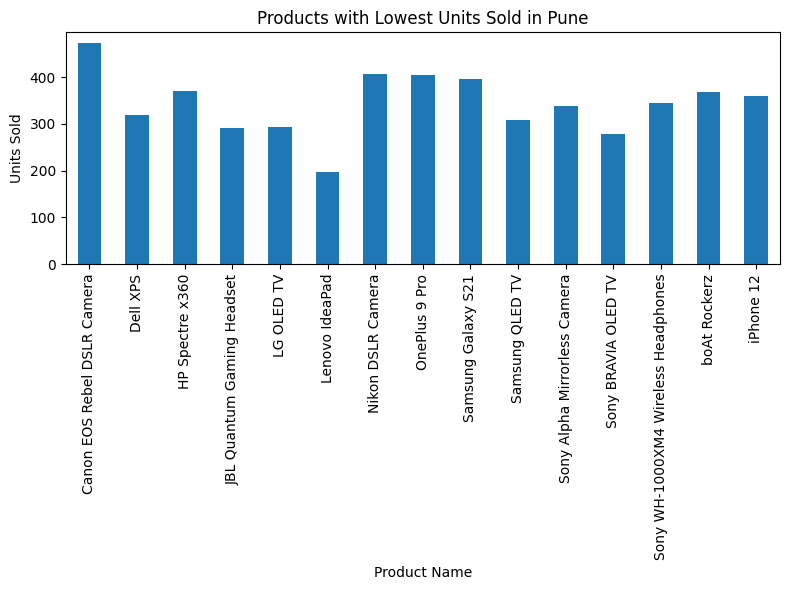

In Pune, the product with the lowest number of units sold is Lenovo IdeaPad


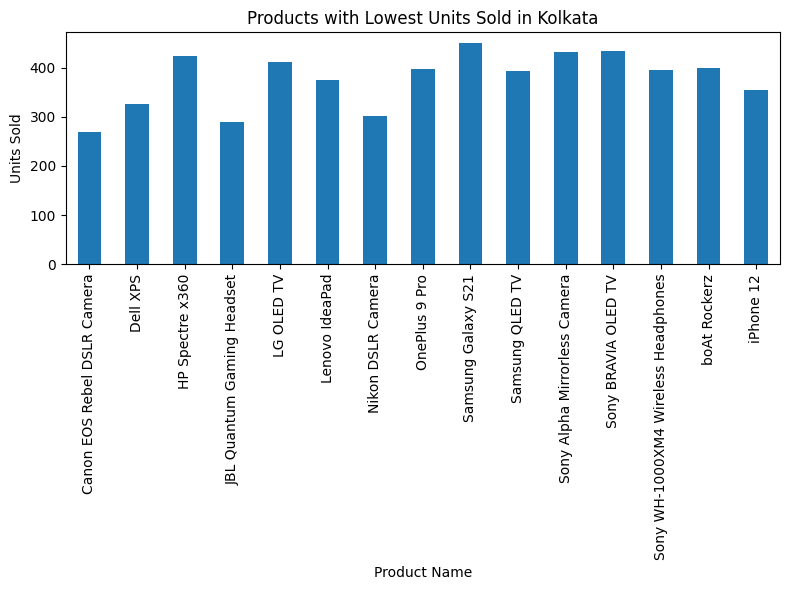

In Kolkata, the product with the lowest number of units sold is Canon EOS Rebel DSLR Camera


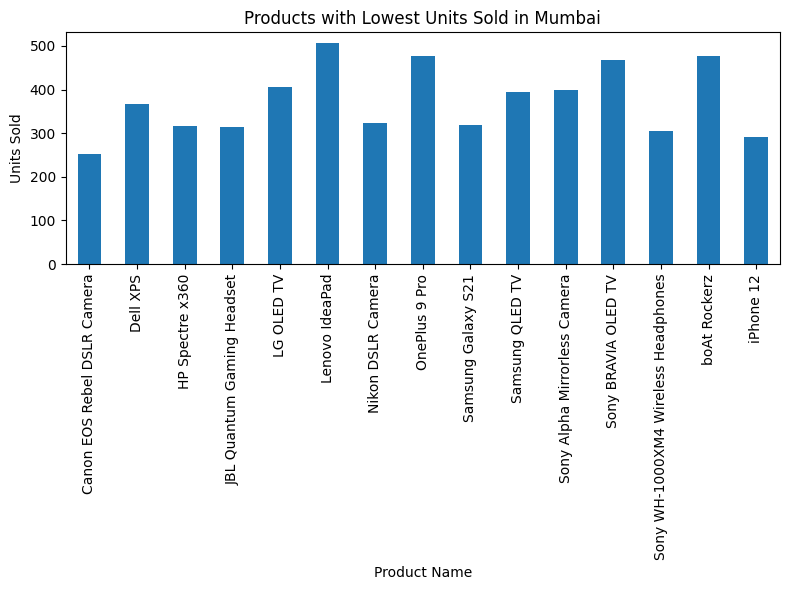

In Mumbai, the product with the lowest number of units sold is Canon EOS Rebel DSLR Camera


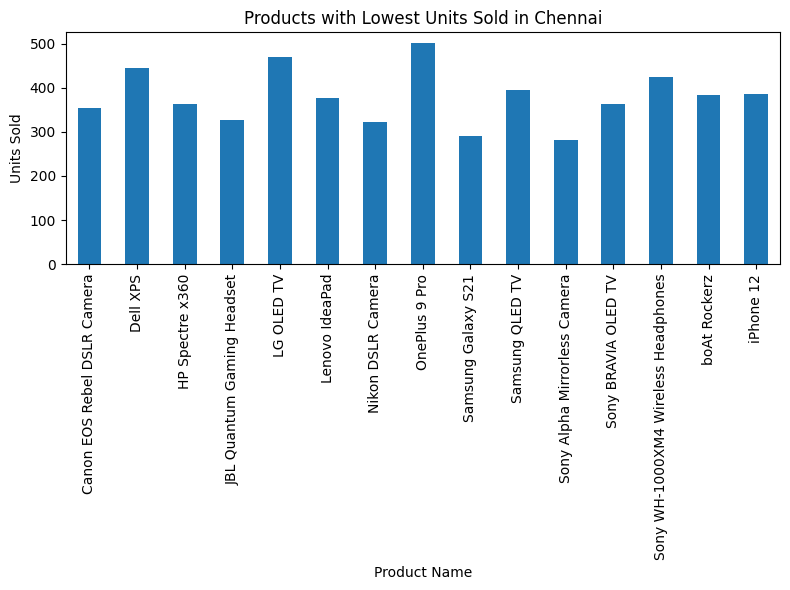

In Chennai, the product with the lowest number of units sold is Sony Alpha Mirrorless Camera


In [ ]:
import matplotlib.pyplot as plt

# Group data by location and product, then sum the units sold
location_product_units_sold = data.groupby(['Location', 'Product_Name'])['Units_Sold'].sum()

# Get the product with the lowest units sold in each location
lowest_units_products = location_product_units_sold.groupby('Location').idxmin().apply(lambda x: x[1])

# Plotting bar charts for each location
for location in data['Location'].unique():
    plt.figure(figsize=(8, 6))
    location_data = location_product_units_sold.loc[location]
    location_data.plot(kind='bar')
    plt.title(f'Products with Lowest Units Sold in {location}')
    plt.xlabel('Product Name')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print(f"In {location}, the product with the lowest number of units sold is {lowest_units_products[location]}")
